In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel("data.xlsx")
data.head()

Client Unnamed: 1 Unnamed: 2             Contract   
0            NaN        NaN        NaN                  NaN  \
1            CNP     Gender        Age         DataSemnarii   
2  1900226063350          M         32  2021-10-15 18:37:54   
3  1900226063350          M         32  2021-11-06 03:38:12   
4  1811228048420          M         41  2021-10-15 10:43:41   

            Unnamed: 4  Unnamed: 5 Unnamed: 6   Unnamed: 7 Unnamed: 8   
0                  NaN         NaN        NaN          NaN        NaN  \
1           DataInchis      Number     Produs  CreditLimit      State   
2  2021-10-16 18:11:03  DK53851057    Penguin         1900     Inchis   
3  2021-12-10 12:29:02  TC42768422    Penguin          700     Inchis   
4  2022-01-14 16:20:02  HP51173676    Penguin         2000     Inchis   

               Scoring  ...         Unnamed: 21         Unnamed: 22   
0                  NaN  ...                 NaN                 NaN  \
1          scoringdate  ...  PenguinIgnoringBNR  DolphinIgnoringBNR   
2  2021-10-15 00:31:13  ...                   0                   0   
3  2021-10-15 00:31:13  ...                   0                   0   
4  2021-10-15 07:34:50  ...                   0                   0   

      Unnamed: 23 Unnamed: 24  Collection     Unnamed: 26 Unnamed: 27   
0             NaN         NaN         NaN             NaN         NaN  \
1  ClientCategory   Comission  Withdrawed  DpdDiffDaysMax    DpdTotal   
2               0           0       -1900             -27           0   
3               0           0        -700             -22           0   
4               0           0       -2000               3           0   

  Unnamed: 28  Unnamed: 29          Computed  
0         NaN          NaN               NaN  
1   PaidTotal  FutureTotal  IsDerrogationBNR  
2     1907.56            0               NaN  
3      783.58            0               NaN  
4     2239.08            0               NaN  

[5 rows x 31 columns]

# Data wrangling

In [3]:
data.columns = data.iloc[1]

In [4]:
df=data.drop([0,1], inplace=False)
df=df.reset_index()

In [5]:
df=df.drop(df.columns[0],axis=1)
df.head()

1            CNP Gender Age         DataSemnarii           DataInchis   
0  1900226063350      M  32  2021-10-15 18:37:54  2021-10-16 18:11:03  \
1  1900226063350      M  32  2021-11-06 03:38:12  2021-12-10 12:29:02   
2  1811228048420      M  41  2021-10-15 10:43:41  2022-01-14 16:20:02   
3  2821224845270      F  40  2021-10-17 10:21:42  2021-12-08 11:55:03   
4  1890122104070      M  33  2021-10-15 08:49:02  2021-12-04 10:04:03   

1      Number   Produs CreditLimit   State          scoringdate  ...   
0  DK53851057  Penguin        1900  Inchis  2021-10-15 00:31:13  ...  \
1  TC42768422  Penguin         700  Inchis  2021-10-15 00:31:13  ...   
2  HP51173676  Penguin        2000  Inchis  2021-10-15 07:34:50  ...   
3  CL14119436  Penguin         700  Inchis  2021-10-15 08:26:57  ...   
4  XJ11096426     Crab         900  Inchis  2021-10-15 08:43:58  ...   

1 PenguinIgnoringBNR DolphinIgnoringBNR ClientCategory Comission Withdrawed   
0                  0                  0              0         0      -1900  \
1                  0                  0              0         0       -700   
2                  0                  0              0         0      -2000   
3                  0                  0              0         0       -700   
4                  0                  0              0         0       -900   

1 DpdDiffDaysMax DpdTotal PaidTotal FutureTotal IsDerrogationBNR  
0            -27        0   1907.56           0              NaN  
1            -22        0    783.58           0              NaN  
2              3        0   2239.08           0              NaN  
3             -5        0    783.58           0              NaN  
4             -8        0      1185           0              NaN  

[5 rows x 31 columns]

In [6]:
df=df.drop(['CNP','Number'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              12516 non-null  object
 1   Age                 12516 non-null  object
 2   DataSemnarii        12516 non-null  object
 3   DataInchis          6827 non-null   object
 4   Produs              12516 non-null  object
 5   CreditLimit         12516 non-null  object
 6   State               12516 non-null  object
 7   scoringdate         12516 non-null  object
 8   score               12516 non-null  object
 9   ProbabilityOfModel  12516 non-null  object
 10  DeclIncome          12516 non-null  object
 11  ANAFIncome          12516 non-null  object
 12  TotalLoanPayments   12516 non-null  object
 13  BNR40Available      12516 non-null  object
 14  CreditsBefore       12516 non-null  object
 15  OfferCrab           12516 non-null  object
 16  OfferPenguin        12

## Toate coloanele sunt object,va fi `putin` de lucru

In [8]:
df.isnull().sum()

1
Gender                    0
Age                       0
DataSemnarii              0
DataInchis             5689
Produs                    0
CreditLimit               0
State                     0
scoringdate               0
score                     0
ProbabilityOfModel        0
DeclIncome                0
ANAFIncome                0
TotalLoanPayments         0
BNR40Available            0
CreditsBefore             0
OfferCrab                 0
OfferPenguin              0
OfferDolphin              0
CrabIgnoringBNR           0
PenguinIgnoringBNR        0
DolphinIgnoringBNR        0
ClientCategory            0
Comission                 0
Withdrawed                0
DpdDiffDaysMax            0
DpdTotal                  0
PaidTotal                 0
FutureTotal               0
IsDerrogationBNR      11405
dtype: int64

### Observam ca datasetul nu are date date nule,cu exceptia a 2 coloane,continuam investigatia

In [9]:
df.duplicated().sum()

0

### Transformam coloanele datetime si din coloanele de la semnare si inchidere a contractului,calculam durata

In [10]:
df['DataInchis']=pd.to_datetime(df['DataInchis'])
df['DataSemnarii']=pd.to_datetime(df['DataSemnarii'])
df['scoringdate']=pd.to_datetime(df['scoringdate'])
df['durata']=(df['DataInchis']-df['DataSemnarii'])
df['durata']=df['durata'].dt.days
df['durata']=df['durata'].fillna(-1)

In [11]:
df=df.drop(['DataInchis'],axis=1)

### Selectam toate coloanele numerice,pentru a le transforma type-ul

In [12]:
numeric_columns=['Age','CreditLimit','score','ProbabilityOfModel','DeclIncome','ANAFIncome','TotalLoanPayments','BNR40Available',
                 'CreditsBefore','OfferCrab','OfferPenguin','OfferDolphin','CrabIgnoringBNR','PenguinIgnoringBNR','DolphinIgnoringBNR',
                 'ClientCategory','Comission','Withdrawed','DpdDiffDaysMax','DpdTotal','PaidTotal','FutureTotal']

In [13]:
for column in numeric_columns:
    df[column]=pd.to_numeric(df[column])

### Selectam toate coloanele object pentru a vedea numarul de valori distincte

In [14]:
object_values=[]
ob_coll=df.select_dtypes(object).columns
for column in ob_coll:
     object_values.append(np.count_nonzero(df[column].value_counts()))

In [15]:
object_values=[]
ob_coll=df.select_dtypes(object).columns
for column in ob_coll:
     object_values.append(np.count_nonzero(df[column].value_counts()))

### Vizualizam cate date distincte are fiecare coloana object

<BarContainer object of 4 artists>

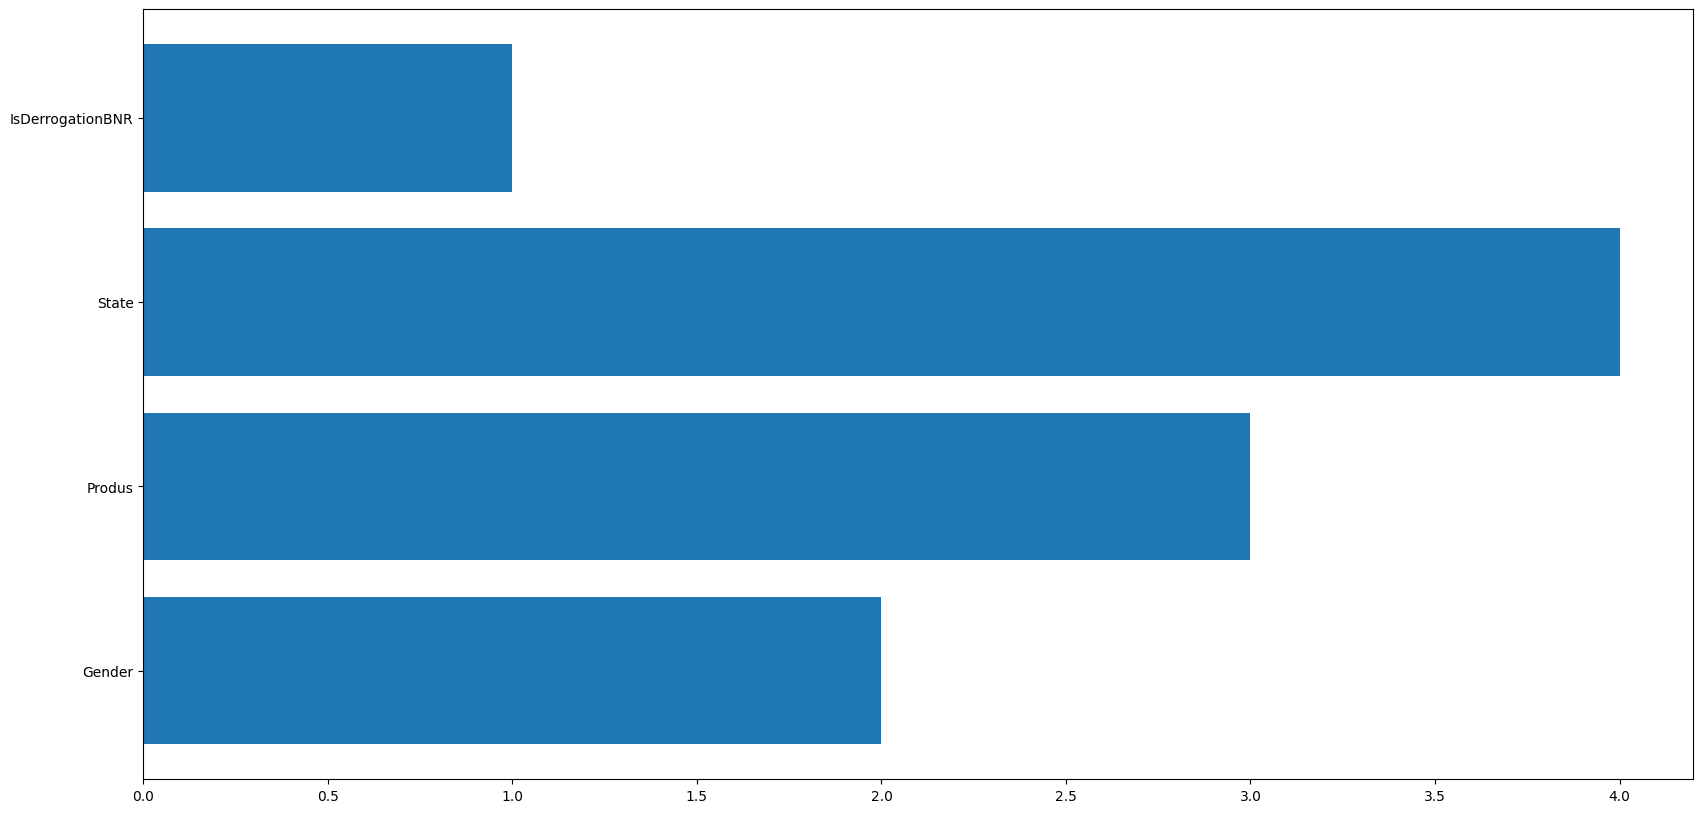

In [16]:
fig = plt.figure(figsize = (20,10))
plt.barh(ob_coll,object_values, label = 'values')

#### Incepem sa analizam fiecare coloana

In [17]:
df['IsDerrogationBNR'].value_counts()

IsDerrogationBNR
True    1111
Name: count, dtype: int64

In [18]:
#df['IsDerrogationBNR']=pd.to_numeric(df['IsDerrogationBNR'])
df['IsDerrogationBNR']=df['IsDerrogationBNR'].fillna(False)

In [19]:
df['State'].value_counts()

State
Inchis       6827
Activ        5429
Executare     259
Moneysend       1
Name: count, dtype: int64

In [20]:
df = df[df['State'] != 'Moneysend']

#### Am facut drop la randul cu moneysend, deoarece este doar unul, iar lipsa sa nu va influenta antrenarea,si este mai usor sa categorizam datele din coloana, v-om categoriza in felul urmator executare:0 deoarece reprezinta cea mai rea valoare,apoi activ:1, si inchis cu 2,deoarece ne arata ca clientul so-a respectat contractul creditar.

## Distributia datelor categoriale

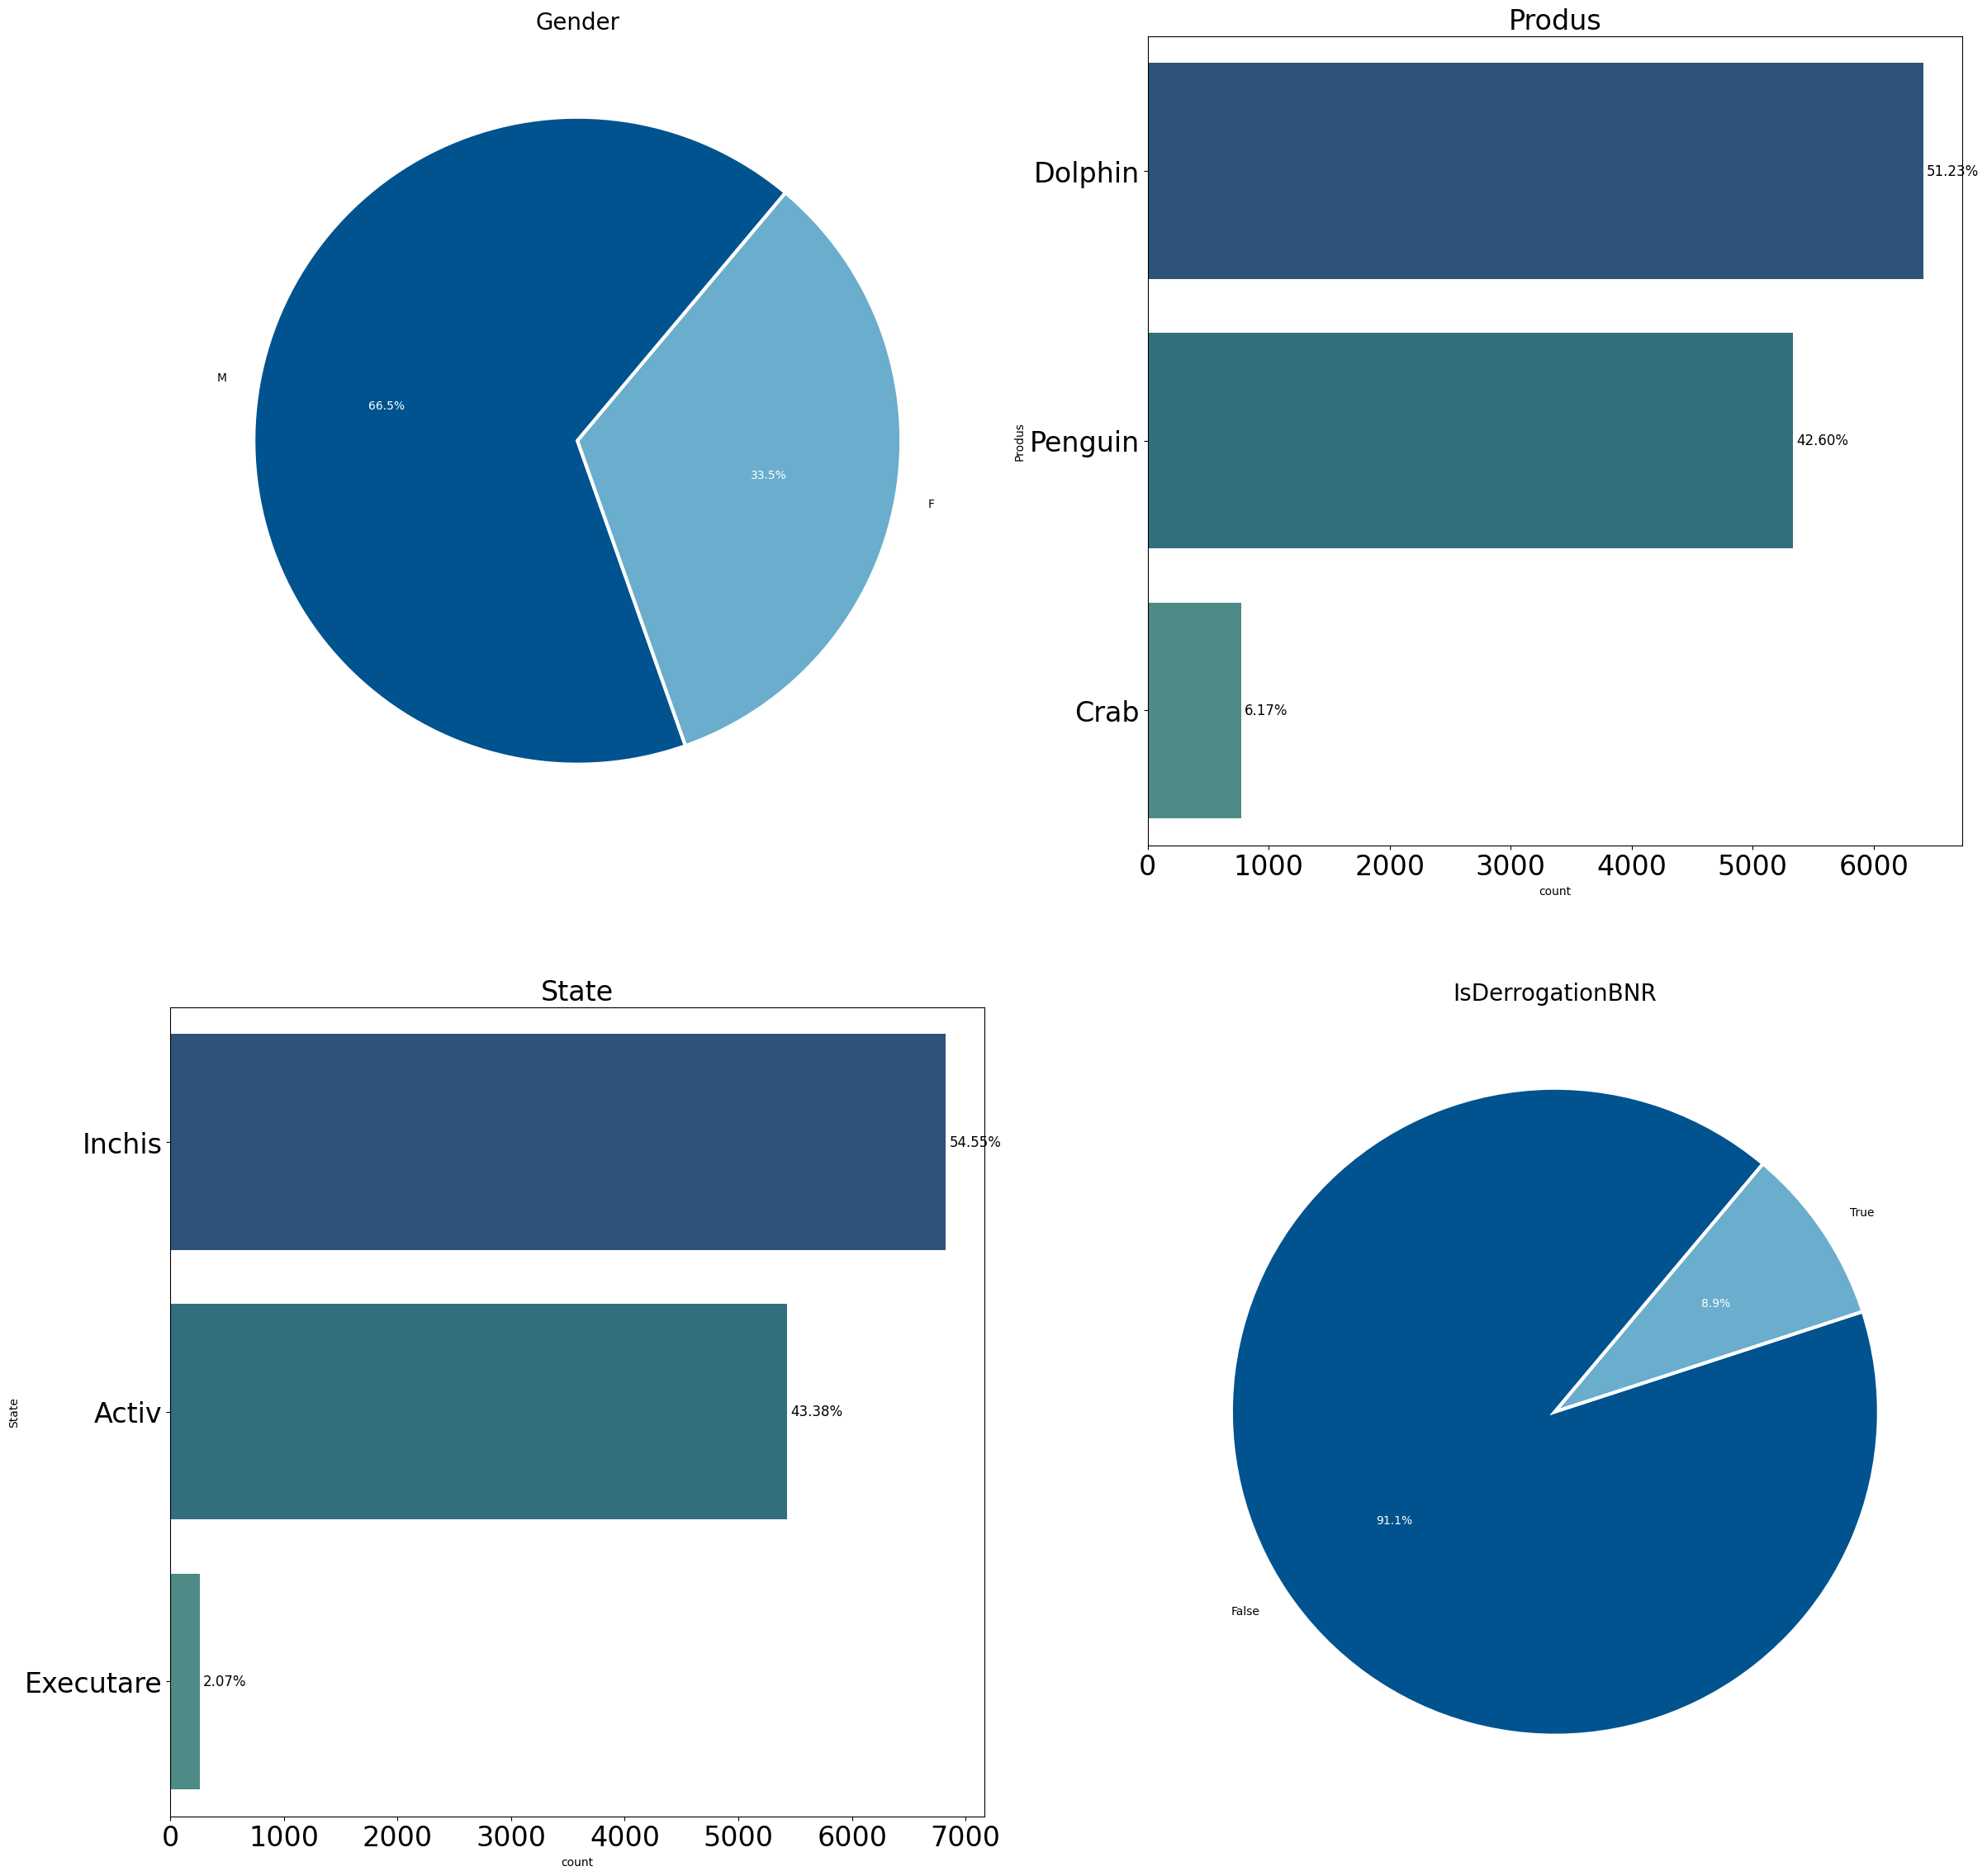

In [21]:
fig, ax = plt.subplots(figsize =(28, 28))
fig.patch.set_facecolor('white')
colors = sns.color_palette("crest_r", n_colors=4).as_hex()

for i in (enumerate(ob_coll)):
    plt.subplot(2, 2, i[0]+1)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    if df[i[1]].value_counts().count() > 2:
        ax = sns.countplot(y = i[1], data = df, order=df[i[1]].value_counts().index, palette=colors)
        pct = df[i[1]].value_counts(ascending=False, normalize=True).values * 100
        ax.bar_label(container=ax.containers[0], labels=list(map('{:.2f}%'.format,pct)), padding=3, size=12, color='black')
        ax.grid(False)
        plt.title(i[1], fontsize=24, color='black')
        

    else:
        _, texts, pcts = plt.pie(
            df[i[1]].value_counts(), 
            labels=df[i[1]].value_counts().index, 
            colors= ['#00538F', '#6AADCC'],
            autopct='%1.1f%%', 
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            startangle=50)
        for pcts in pcts:
          pcts.set_color('white')
        plt.title(i[1], fontsize=20, color='black')
        plt.xticks(fontsize=24)
        plt.yticks(fontsize=24)


plt.show()  

## Distributia datelor numerice

<function matplotlib.pyplot.show(close=None, block=None)>

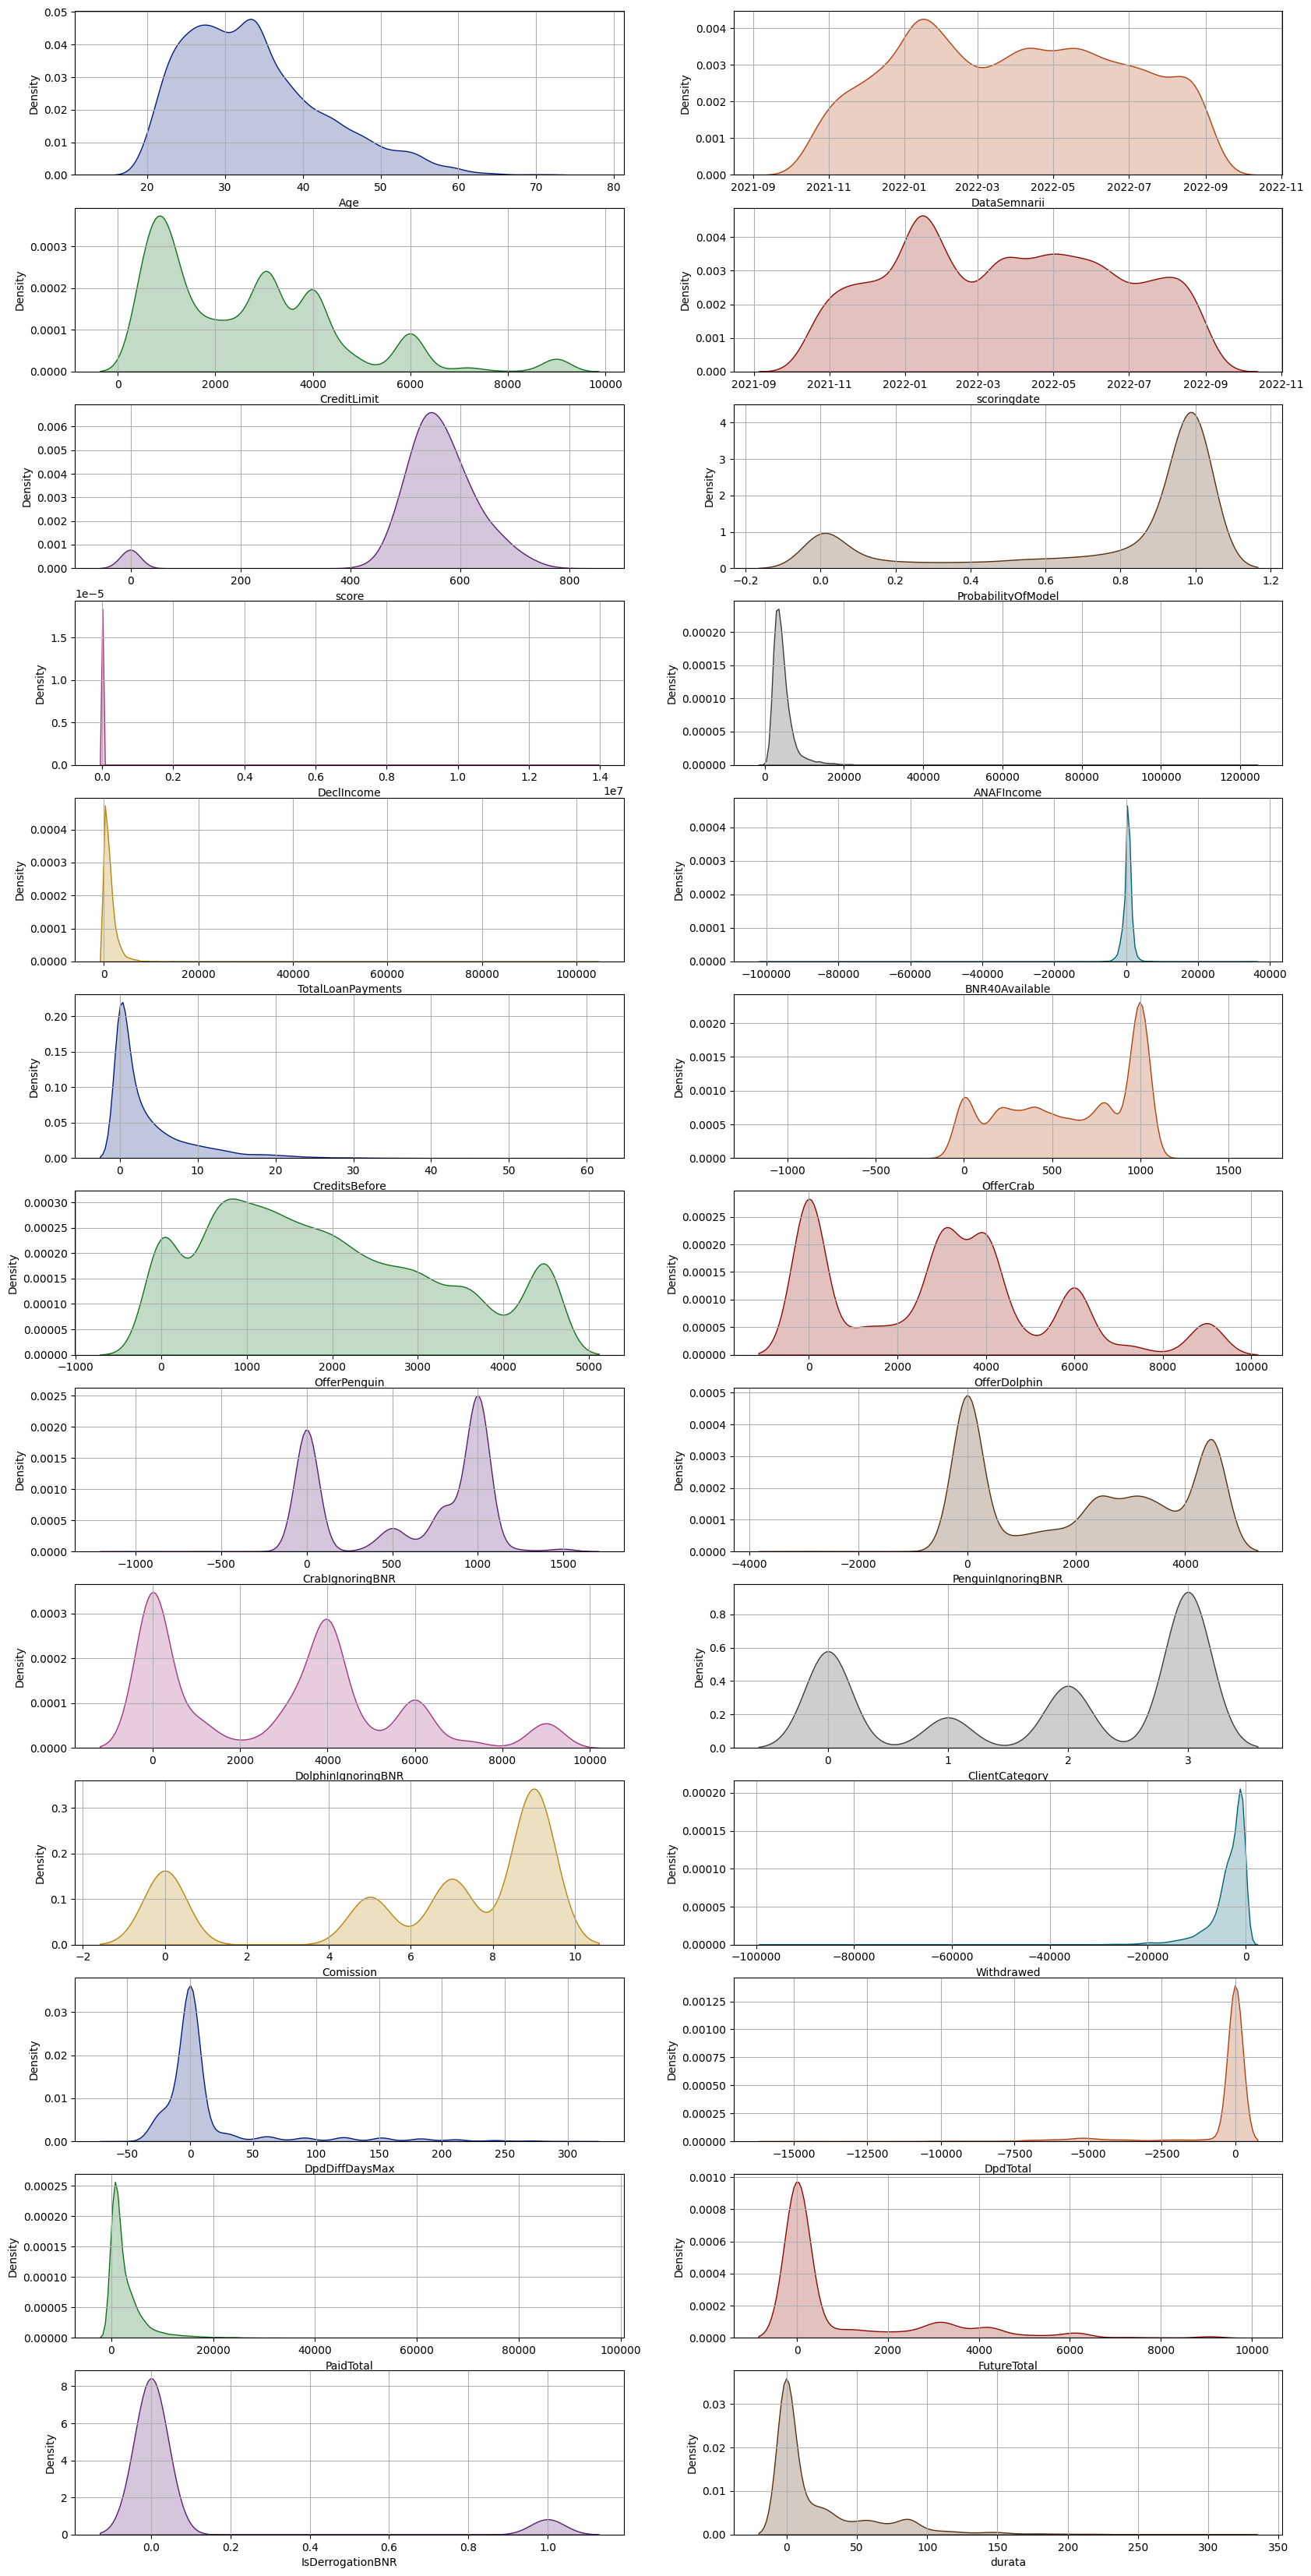

In [22]:
# Select numerical variables
numeric = df.select_dtypes(exclude=object).columns
fig, ax = plt.subplots(figsize =(20, 65))
fig.patch.set_facecolor('white')
colors = sns.color_palette("dark", n_colors=30).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(20, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = df, color=colors[i[0]], fill=True)
    plt.grid()
plt.show

### Se observa o distributie asimetrica destul de mare a datelor

### Vom considera Coloana de stare curenta a creditului ca target, dar vom folosi doar starea inchisa si starea in executare iar pe langa aceasta vom analiza linia de credit delphin

In [23]:
credite_gata = df[df['State'].isin(['Executare','Inchis'])]
credite_continue=df[df['State'].isin(['Activ'])]
print(credite_gata['Produs'].value_counts())
#print(credite_continue['Produs'].value_counts())

Produs
Penguin    4129
Dolphin    2266
Crab        691
Name: count, dtype: int64


### Encodam datele categoriale

In [24]:
lbl_enc=LabelEncoder()
df[ob_coll]=df[ob_coll].astype(str).apply(lbl_enc.fit_transform)


In [25]:
credite_gata = df[df['State'].isin([1,2])]
credite_executate=df[df['State'].isin([1])]
y=pd.DataFrame(credite_gata['State'])
y=y.replace({2:0} )
X=pd.DataFrame(credite_gata.drop('State',axis=1))
credite_continue=df[df['State'].isin([0])]
credite_gata['Produs'].value_counts()
y.value_counts
X.shape

(7086, 28)

In [26]:
# fig, ax = plt.subplots(figsize =(20, 80))
# fig.patch.set_facecolor('white')
# colors = sns.color_palette("dark", n_colors=30).as_hex()
# j=0
# for column in df.columns:
#     plt.subplot(20, 2, j+1)
#     j+=1
#     sns.histplot(data=df[column][df["State"]==1],color='r', kde=True)
#     sns.histplot(data=df[column][df["State"]==0],color='g', kde=True)
#     plt.xlabel('Values')  # Set the x-axis label
#     plt.ylabel('Density')  # Set the y-axis label
#     plt.title(f'Distribution of {column} ')  # Set the title

#     plt.tight_layout()  # Adjust the spacing between subplots
# plt.show()  # Display the plot


### Analizam asimetria datelor

In [27]:
selected_columns =[]
for column in X.columns:
    if X[column].unique().size>5:
        selected_columns.append(column)
X_selected = X[selected_columns]
X_selected=X_selected.select_dtypes(exclude=['datetime','object','bool']).columns
skew_limit = 0.75

skew_vals = X[X_selected].skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit]
skew_cols = skew_cols.rename('Skew')
skewed_columns = skew_cols.index.tolist()
skew_cols.sort_values(ascending=False)

1
DeclIncome            15.804340
ANAFIncome            15.573853
BNR40Available         5.528275
PaidTotal              5.168272
DpdDiffDaysMax         4.118964
TotalLoanPayments      3.529127
CreditsBefore          2.207244
durata                 1.675854
CreditLimit            1.556731
Age                    0.897433
ProbabilityOfModel    -1.264699
score                 -3.135745
Withdrawed            -5.447271
DpdTotal              -7.747517
Name: Skew, dtype: float64

### Vizualizam corelatia pe datasetul total

<Axes: xlabel='1', ylabel='1'>

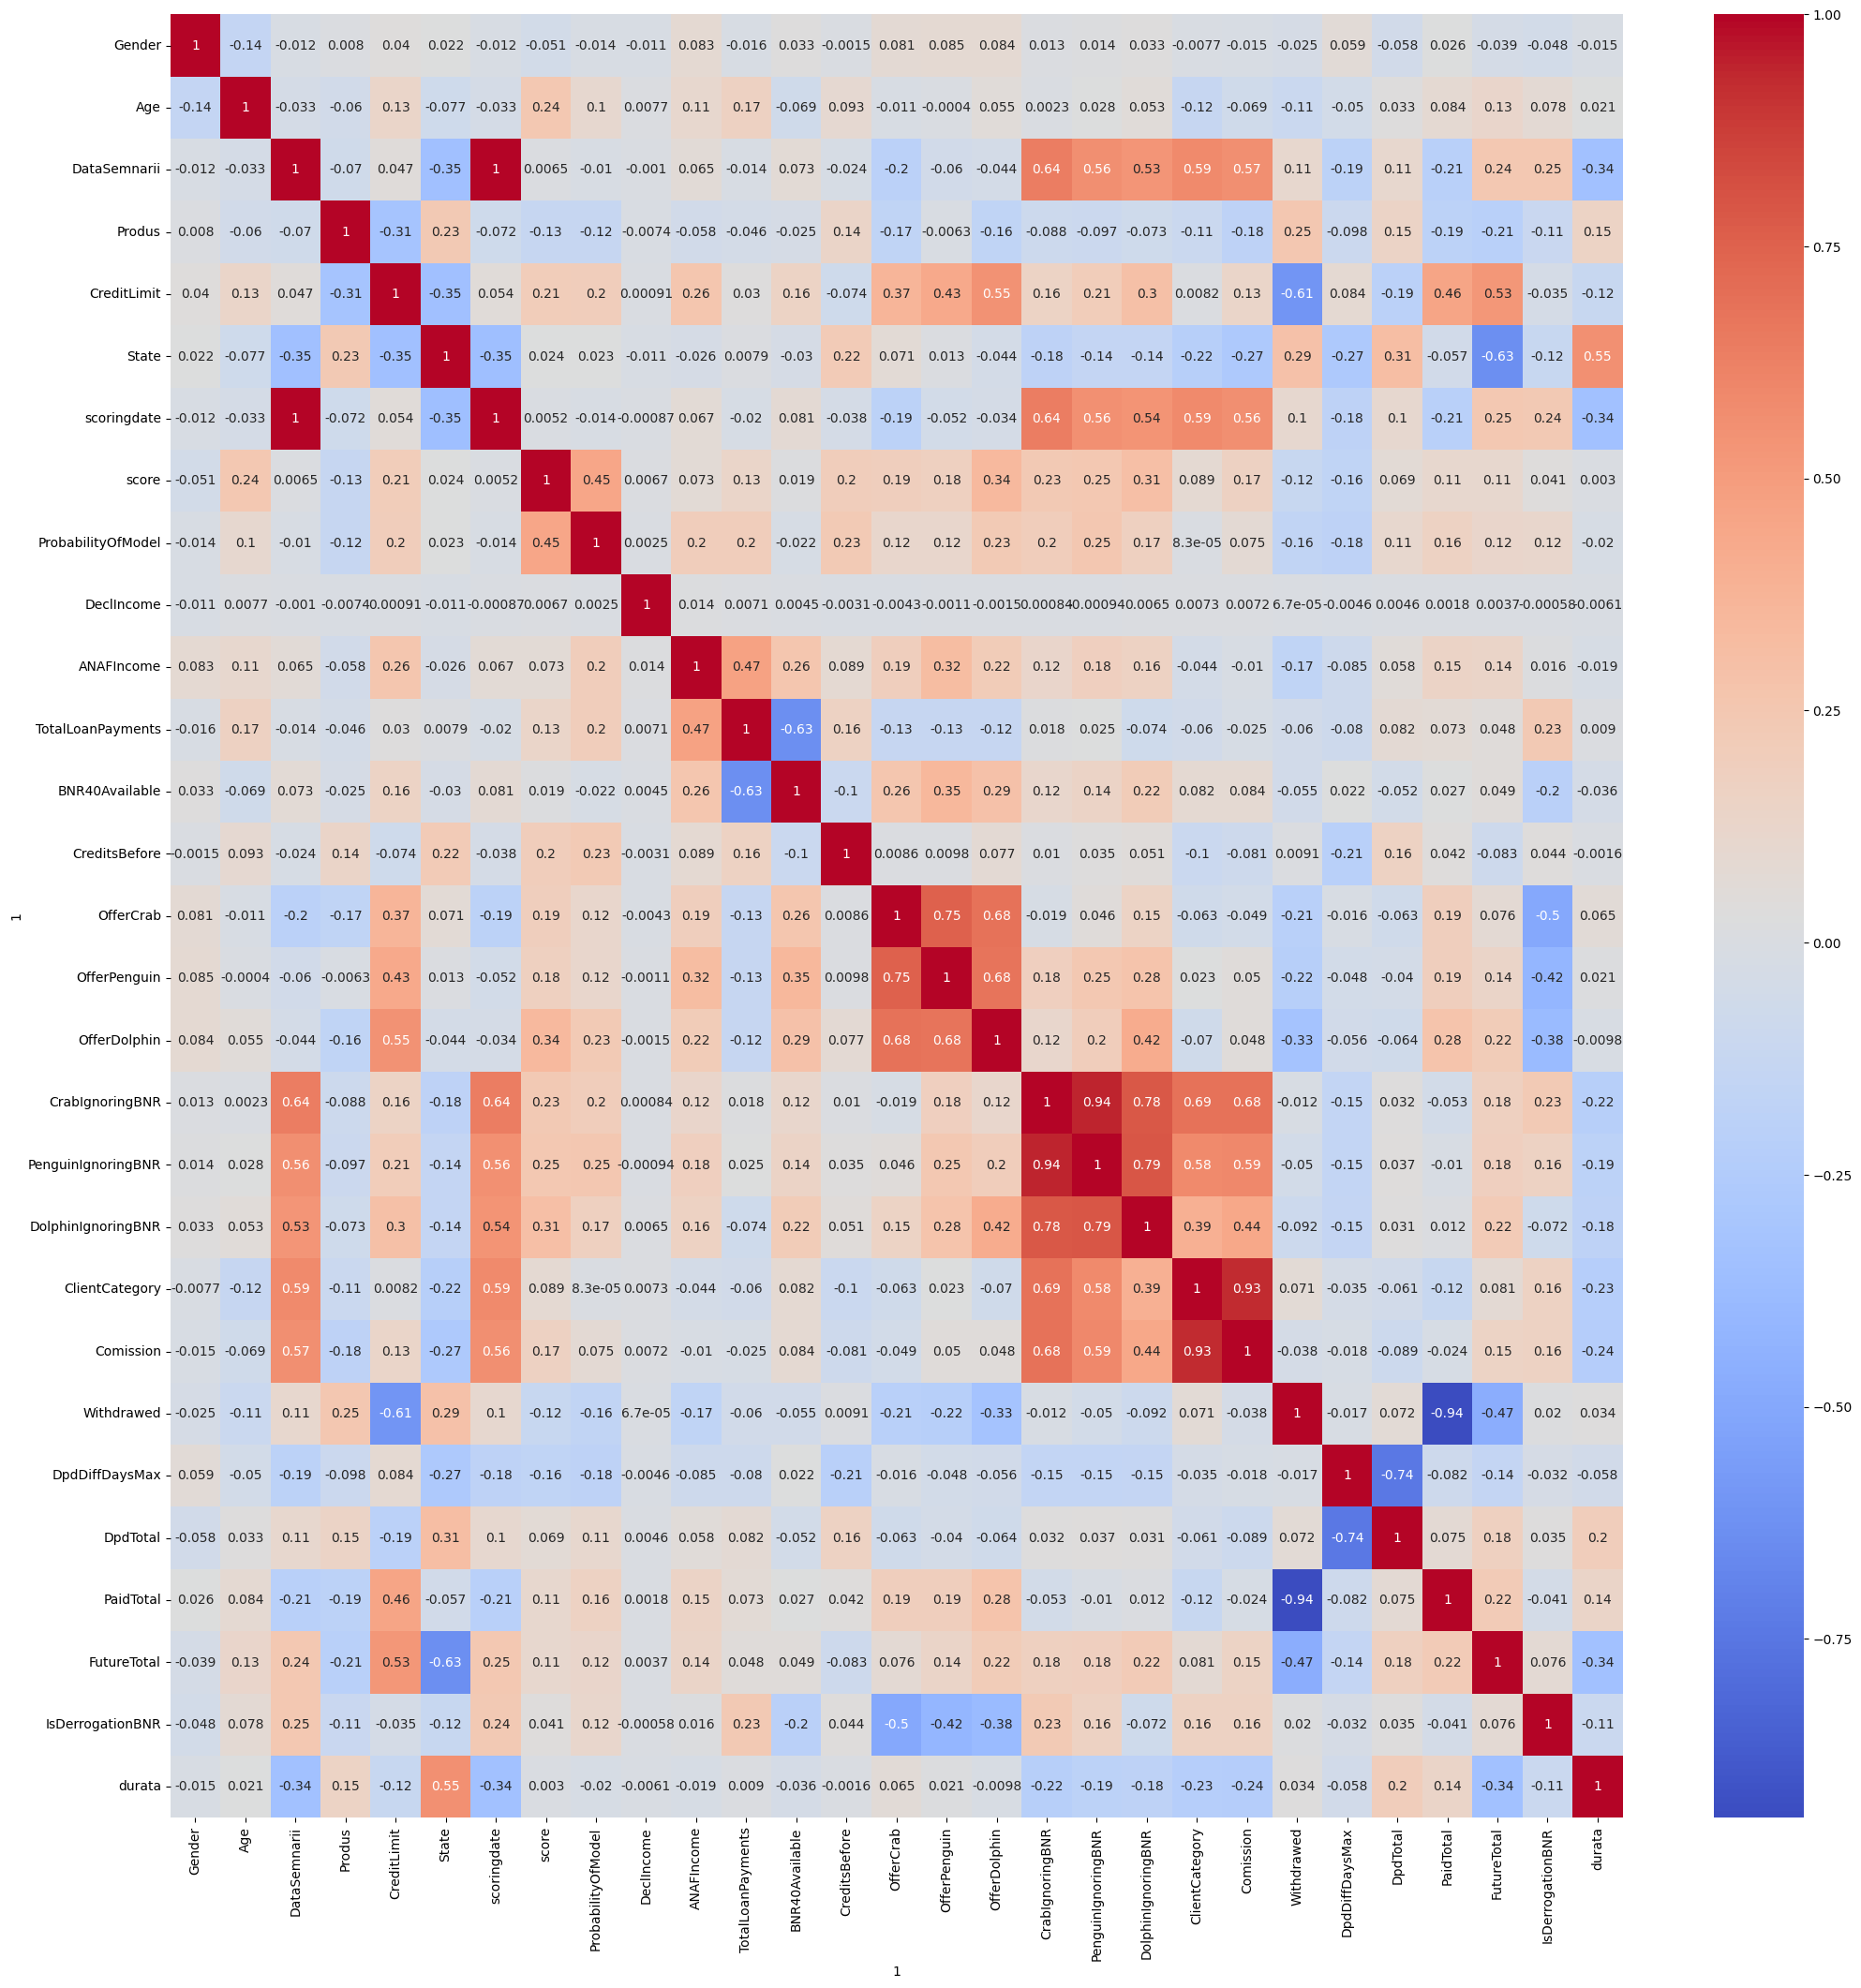

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### Venitul declarat nu  are nici o corelatie de nivel inalt,plus ca devine inutil in cazul in care sunt prezente datele de la ANAF,insa poate fi analizat daca clientii riscanti au declarat un venit cu mult mai mare decat cel real pentru a fi acceptati
### Facem drop la data semnarii,deoarece are aproximativ aceeasi corelatie ca si data de scoring,iar coloana comision are o legatura stransa cu client category,
### Putem Inlatura si BNR40 din prezicere,si sa o afisam doar in calcule,deoarece are o legatura matematica cu ANAF Income si Total Loan Payments

In [29]:
X['diferenta_income']=X['DeclIncome']-X['ANAFIncome']

In [30]:
X=X.drop(['scoringdate','Comission',],axis=1)

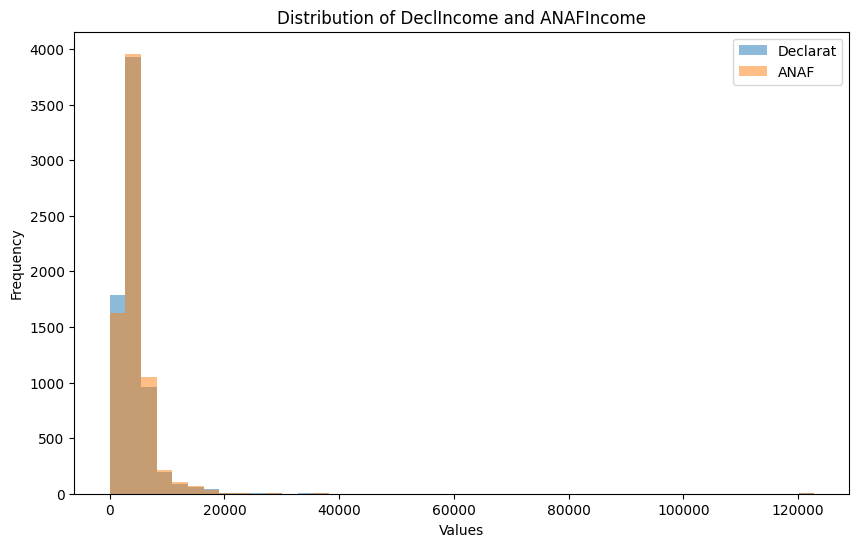

In [31]:
plt.figure(figsize=(10, 6)) 
plt.hist(X['DeclIncome'],bins = int(180/4), alpha=0.5, label='Declarat')
plt.hist(X['ANAFIncome'], int(180/4), alpha=0.5, label='ANAF')
plt.xlabel('Values') 
plt.ylabel('Frequency') 
plt.title('Distribution of DeclIncome and ANAFIncome')
plt.legend()  
plt.show()  

In [32]:
df_tot=pd.concat([X,y],axis=1)
df_execut=df_tot[df_tot['State']==1]
df_execut['diferenta_income']

8        638
19      2585
21       516
28      -302
33         0
        ... 
4505    -285
4542   -3090
4689   -1346
4805      11
4872   -1141
Name: diferenta_income, Length: 259, dtype: int64

### Diferenta intre declaratia de venit si cea de la ANAF pentru creditele in executare

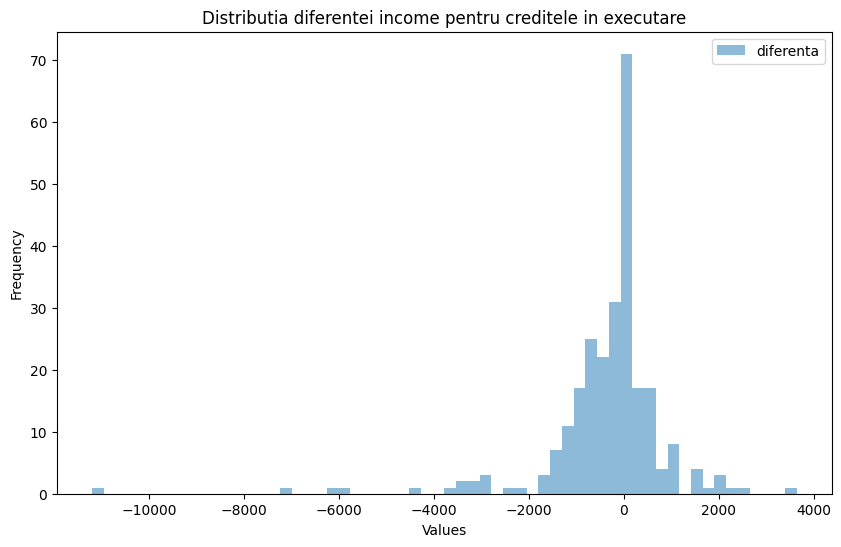

In [33]:
plt.figure(figsize=(10, 6)) 
plt.hist(df_execut['diferenta_income'], int(180/3), alpha=0.5, label='diferenta')
plt.xlabel('Values') 
plt.ylabel('Frequency') 
plt.title('Distributia diferentei income pentru creditele in executare')
plt.legend()  
plt.show()  

In [34]:

# for col in numeric_only:
#     df[col] = MinMaxScaler().fit_transform(df[[col]])
# for col in float_data:
#     df[col] = MinMaxScaler().fit_transform(df[[col]])

### Normalizam datele prin radacina cubica, deoarece avem date negative si egale cu 0,din aceasta cauza nu se poate folosi metoda logaritmica sau a radacinii patrate

In [35]:
for col in skewed_columns:
    #df[col] = MinMaxScaler().fit_transform(df[[col]])
    #df[col] = scaler.fit_transform(df[[col]])
    df[col] = np.cbrt(df[col])
    X[col] = np.cbrt(X[col]) # normalizam data

<function matplotlib.pyplot.show(close=None, block=None)>

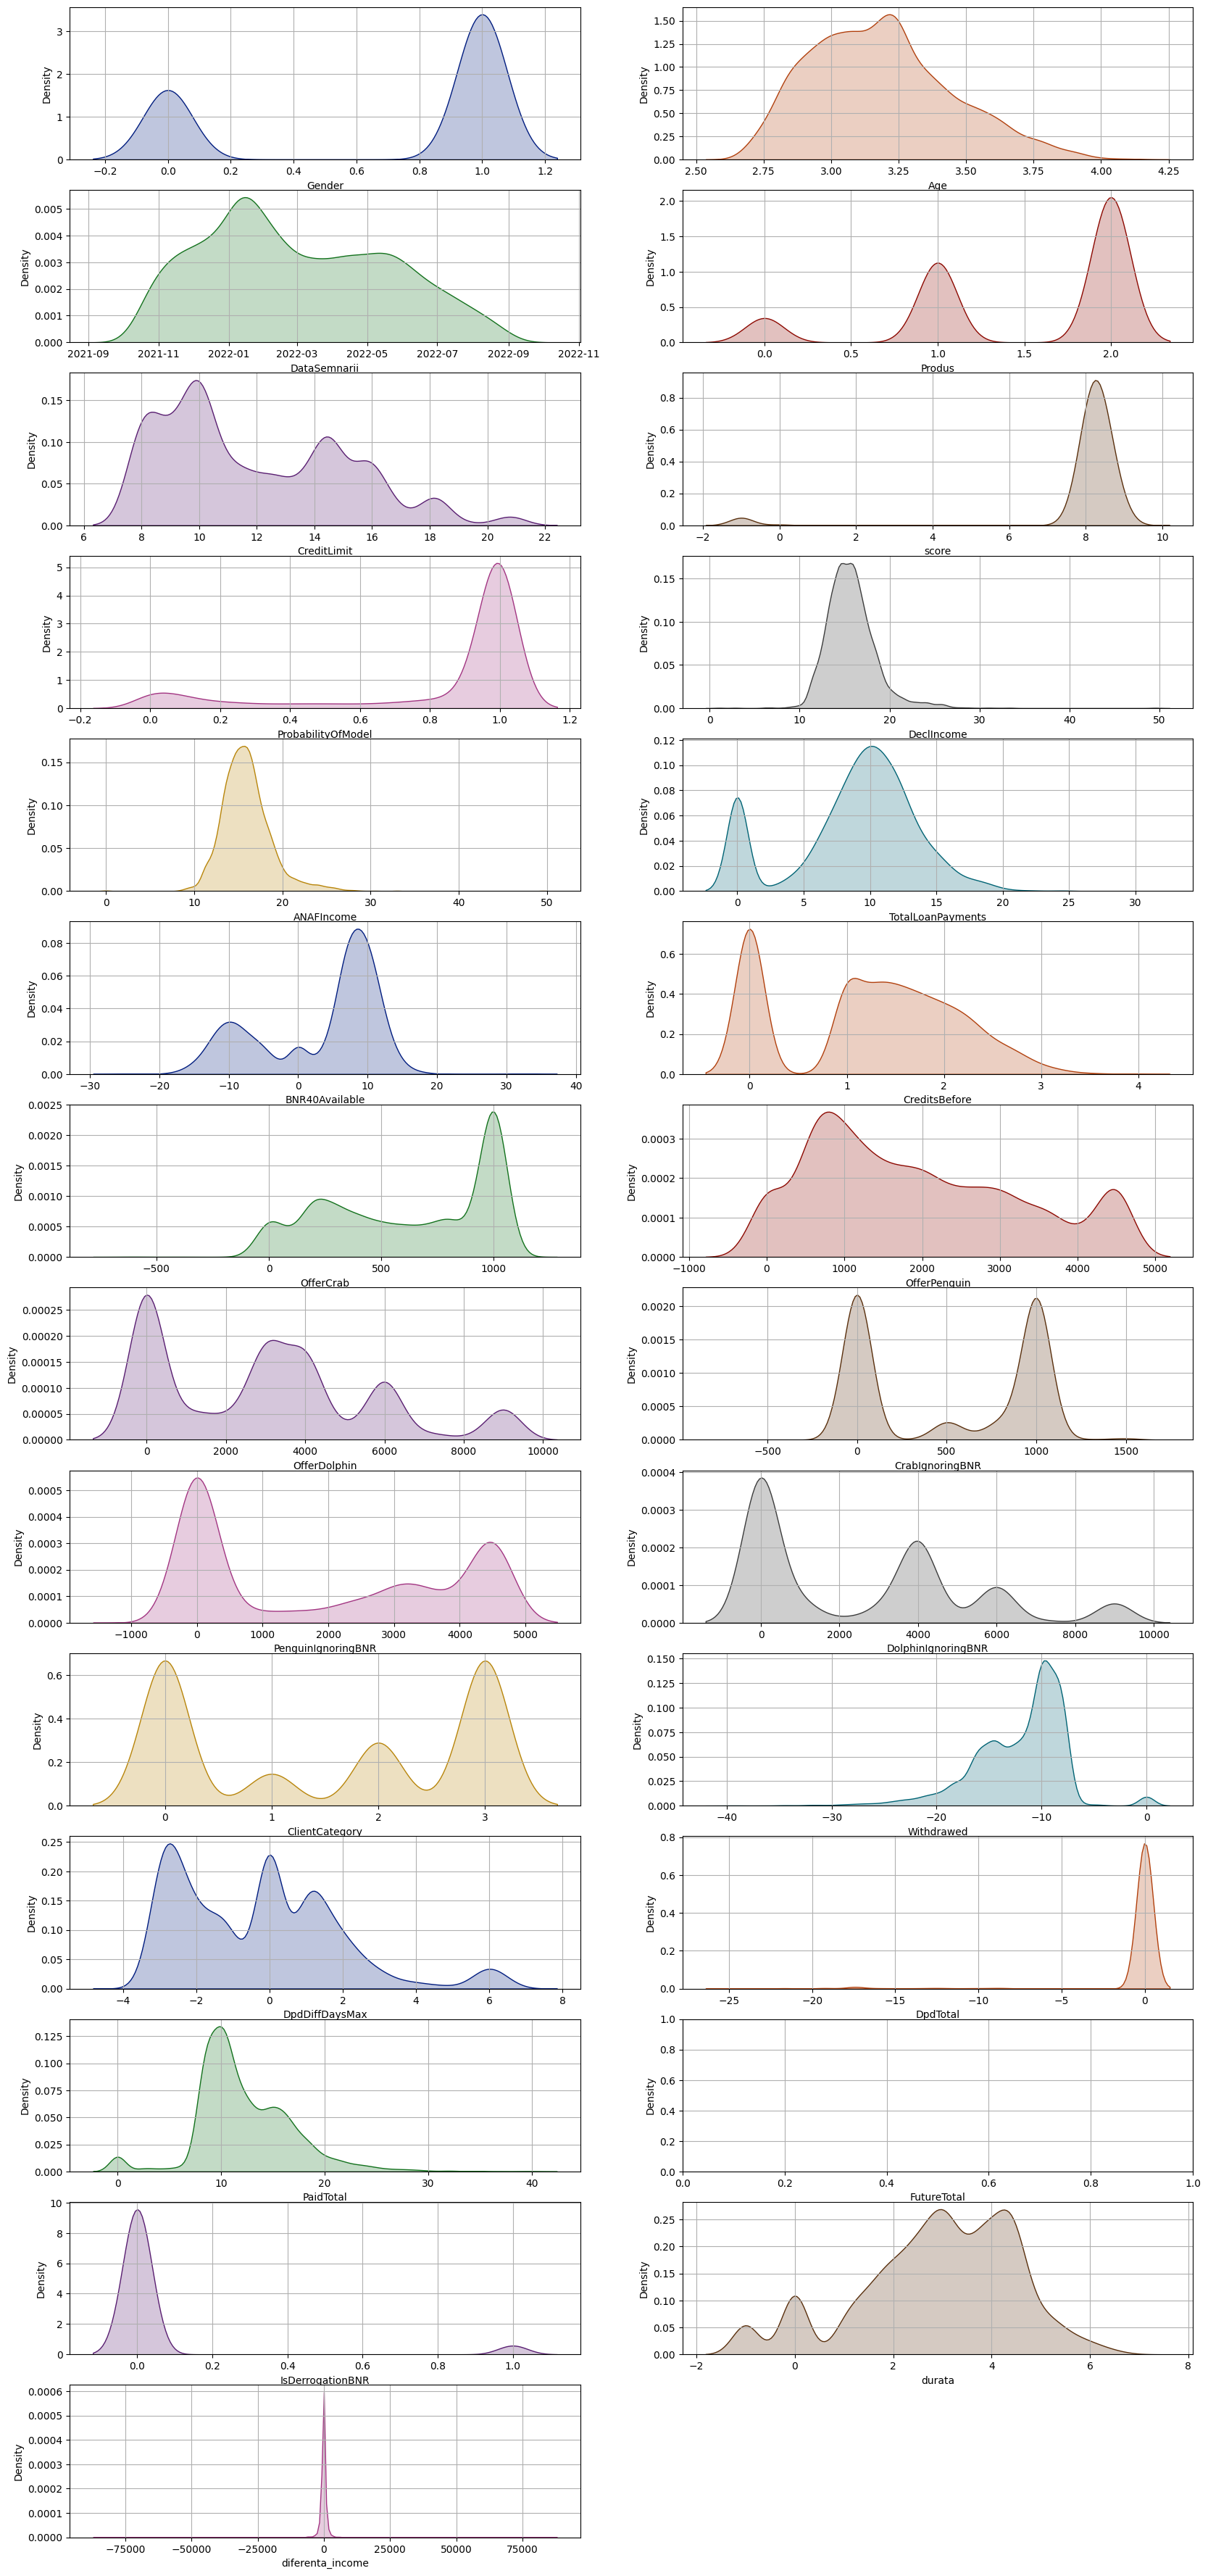

In [36]:
numeric = X.select_dtypes(exclude=object).columns
fig, ax = plt.subplots(figsize =(20, 65))
fig.patch.set_facecolor('white')
colors = sns.color_palette("dark", n_colors=30).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(20, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = X, color=colors[i[0]], fill=True)
    plt.grid()
plt.show

## Daca atragem atentia la DpdDiffDaysMax, putem observa o asemanare cu alte coloane(avand 4 maximuri locale ),Dar cel mai mult se aseamana cu coloane de la oferta Dephin,cea de la Ocean credit si cea de la BNR

### Se observa ca exista outliere,dar posibil sa reprezinte clientii riscanti,asa ca nu este exclusa la moment

### IsDerrogation BNR are o distributie aproximativ egala cu cea a coloanei target

# Pentru o Munca cinstita,  va fi corect de a elimina coloana de ,,ProbabilityOfModel``

In [37]:
X=X.drop(['ProbabilityOfModel'],axis=1)


In [38]:
X['Zile_semnare']=(dt.datetime.now()-X['DataSemnarii']).dt.days
X=X.drop('DataSemnarii',axis=1)

# Balancing

In [39]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)

# X_smote, y_smote = smote.fit_resample(X, y)

# print(f'''Shape of X before SMOTE: {X.shape}
# Shape of X after SMOTE: {X_smote.shape}''')

# print('\nBalance of positive and negative classes (%):')
# y_smote.value_counts(normalize=True) * 100

### Incercam un model, pentru a vedea situatia la moment

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1368
           1       0.96      1.00      0.98        50

    accuracy                           1.00      1418
   macro avg       0.98      1.00      0.99      1418
weighted avg       1.00      1.00      1.00      1418



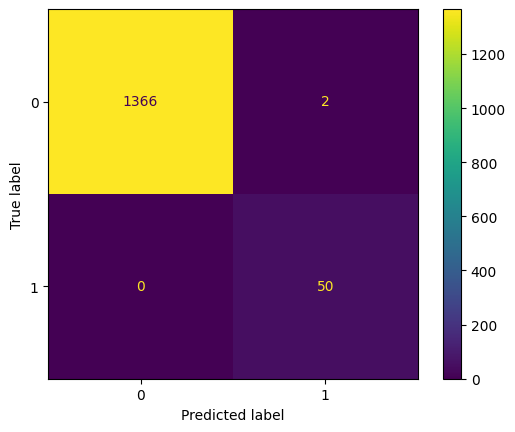

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report
lr_model = LogisticRegression(random_state=42,class_weight='balanced')
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))

In [42]:
# df['target'] = y['target']
# data['target'] = df['target']

In [43]:
df_total=pd.concat([X,y],axis=1)

<Axes: >

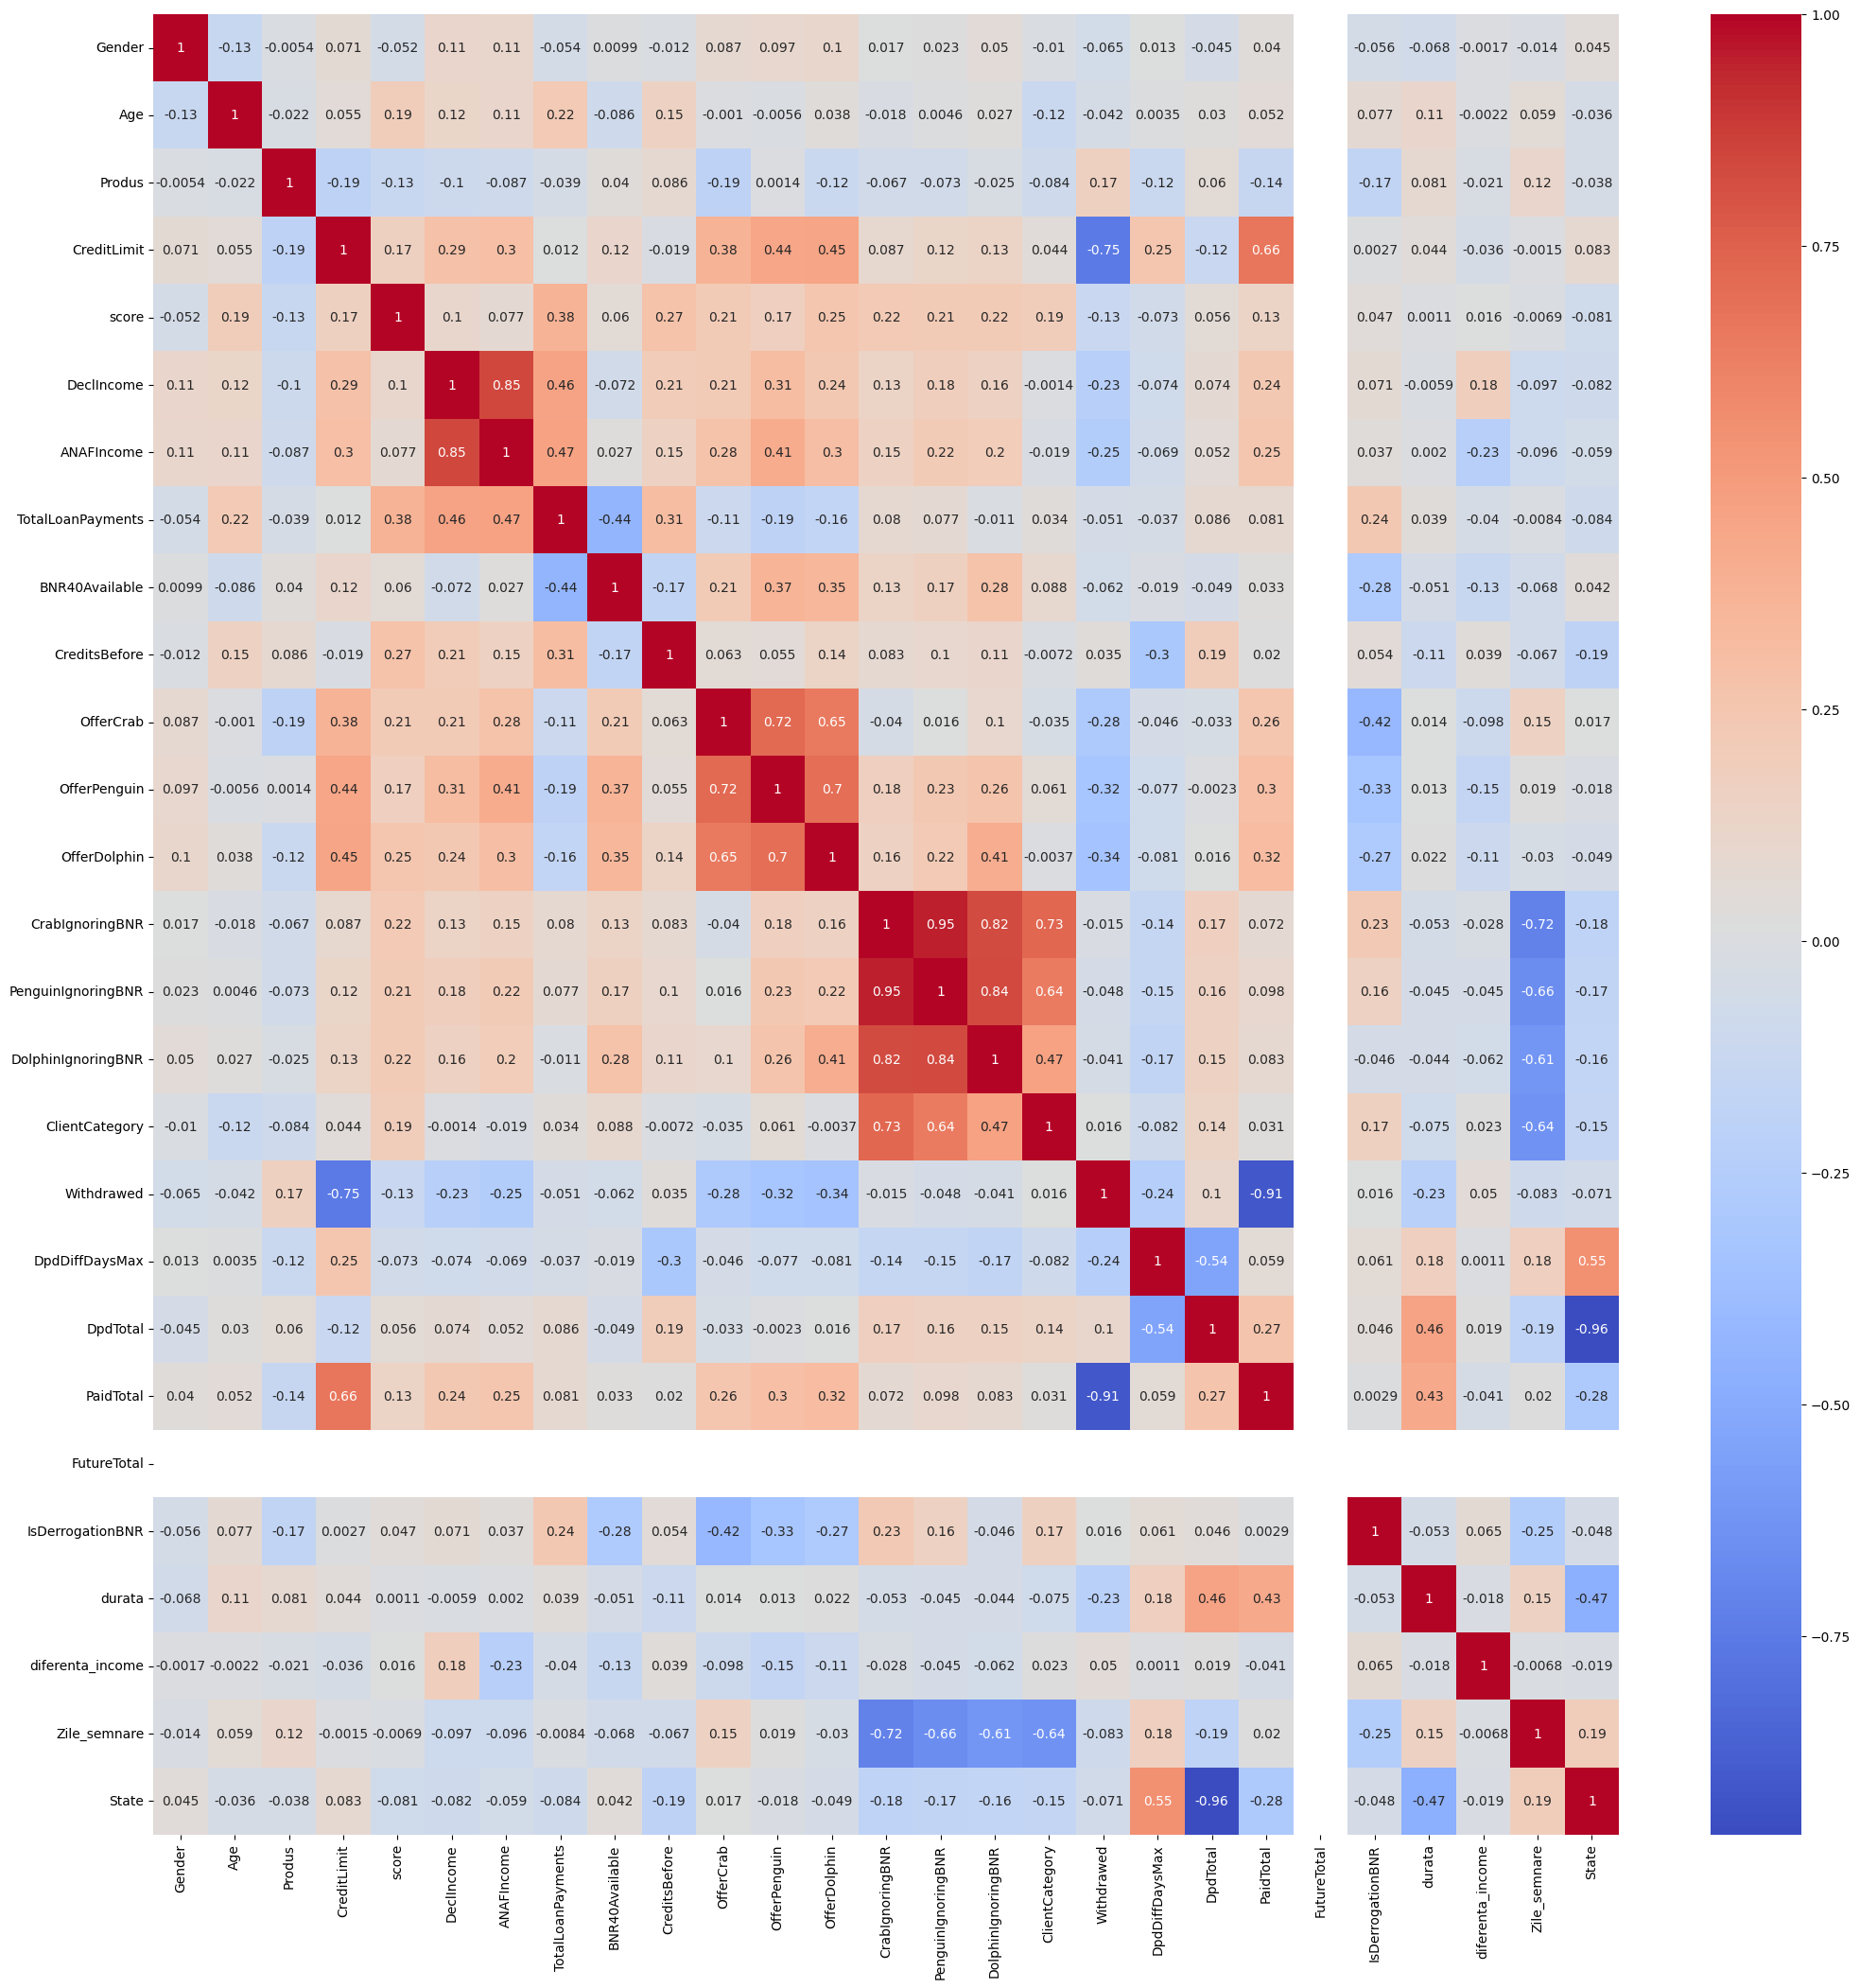

In [44]:
plt.figure(figsize=(25,25))
sns.heatmap(df_total.corr(),annot=True,cmap='coolwarm')

In [45]:
weights = lr_model.coef_
# Print the weights
print(weights)

[[ 1.27092637e-02 -1.95548705e-02 -2.31661980e-02  8.27307374e-02
  -4.14598090e-02 -1.05315784e-01 -9.88235154e-02 -9.82242959e-02
   9.00056758e-02 -7.68725260e-02  3.84797546e-04  2.96273718e-04
  -8.43017158e-04 -1.44603060e-02  1.79195281e-03  5.90336075e-04
  -1.29615842e-02 -1.62384929e-01  5.79389015e-01 -1.34498866e+00
  -6.00851234e-01  0.00000000e+00 -2.08538010e-03 -3.97064735e-01
  -8.92443385e-04 -4.39062166e-04]]


In [46]:
X=X.drop(['DpdDiffDaysMax','DpdTotal'],axis=1)


              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1368
           1       0.28      0.96      0.44        50

    accuracy                           0.91      1418
   macro avg       0.64      0.94      0.70      1418
weighted avg       0.97      0.91      0.93      1418



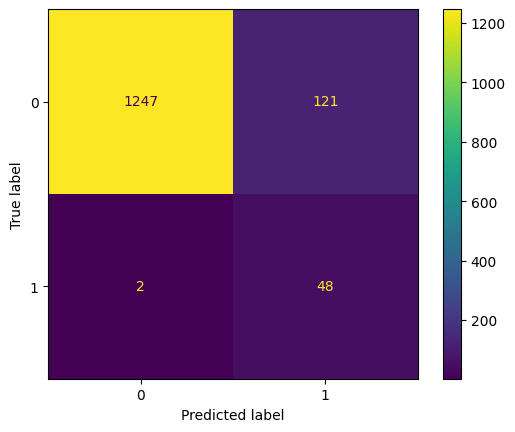

In [47]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))

In [48]:
X.columns

Index(['Gender', 'Age', 'Produs', 'CreditLimit', 'score', 'DeclIncome',
       'ANAFIncome', 'TotalLoanPayments', 'BNR40Available', 'CreditsBefore',
       'OfferCrab', 'OfferPenguin', 'OfferDolphin', 'CrabIgnoringBNR',
       'PenguinIgnoringBNR', 'DolphinIgnoringBNR', 'ClientCategory',
       'Withdrawed', 'PaidTotal', 'FutureTotal', 'IsDerrogationBNR', 'durata',
       'diferenta_income', 'Zile_semnare'],
      dtype='object', name=1)

### Facem drop la coloanele istorice,ca sa putem prezice doar din date pe care le are un client la aplicare

In [49]:
X=X.drop(['DeclIncome','Withdrawed', 'PaidTotal', 'FutureTotal', 'IsDerrogationBNR','diferenta_income'],axis=1)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1368
           1       0.52      0.98      0.68        50

    accuracy                           0.97      1418
   macro avg       0.76      0.97      0.83      1418
weighted avg       0.98      0.97      0.97      1418



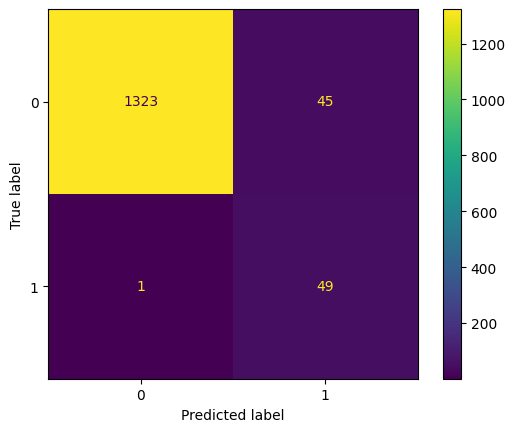

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))

In [51]:
df_total=pd.concat([X,y],axis=1)

<Axes: >

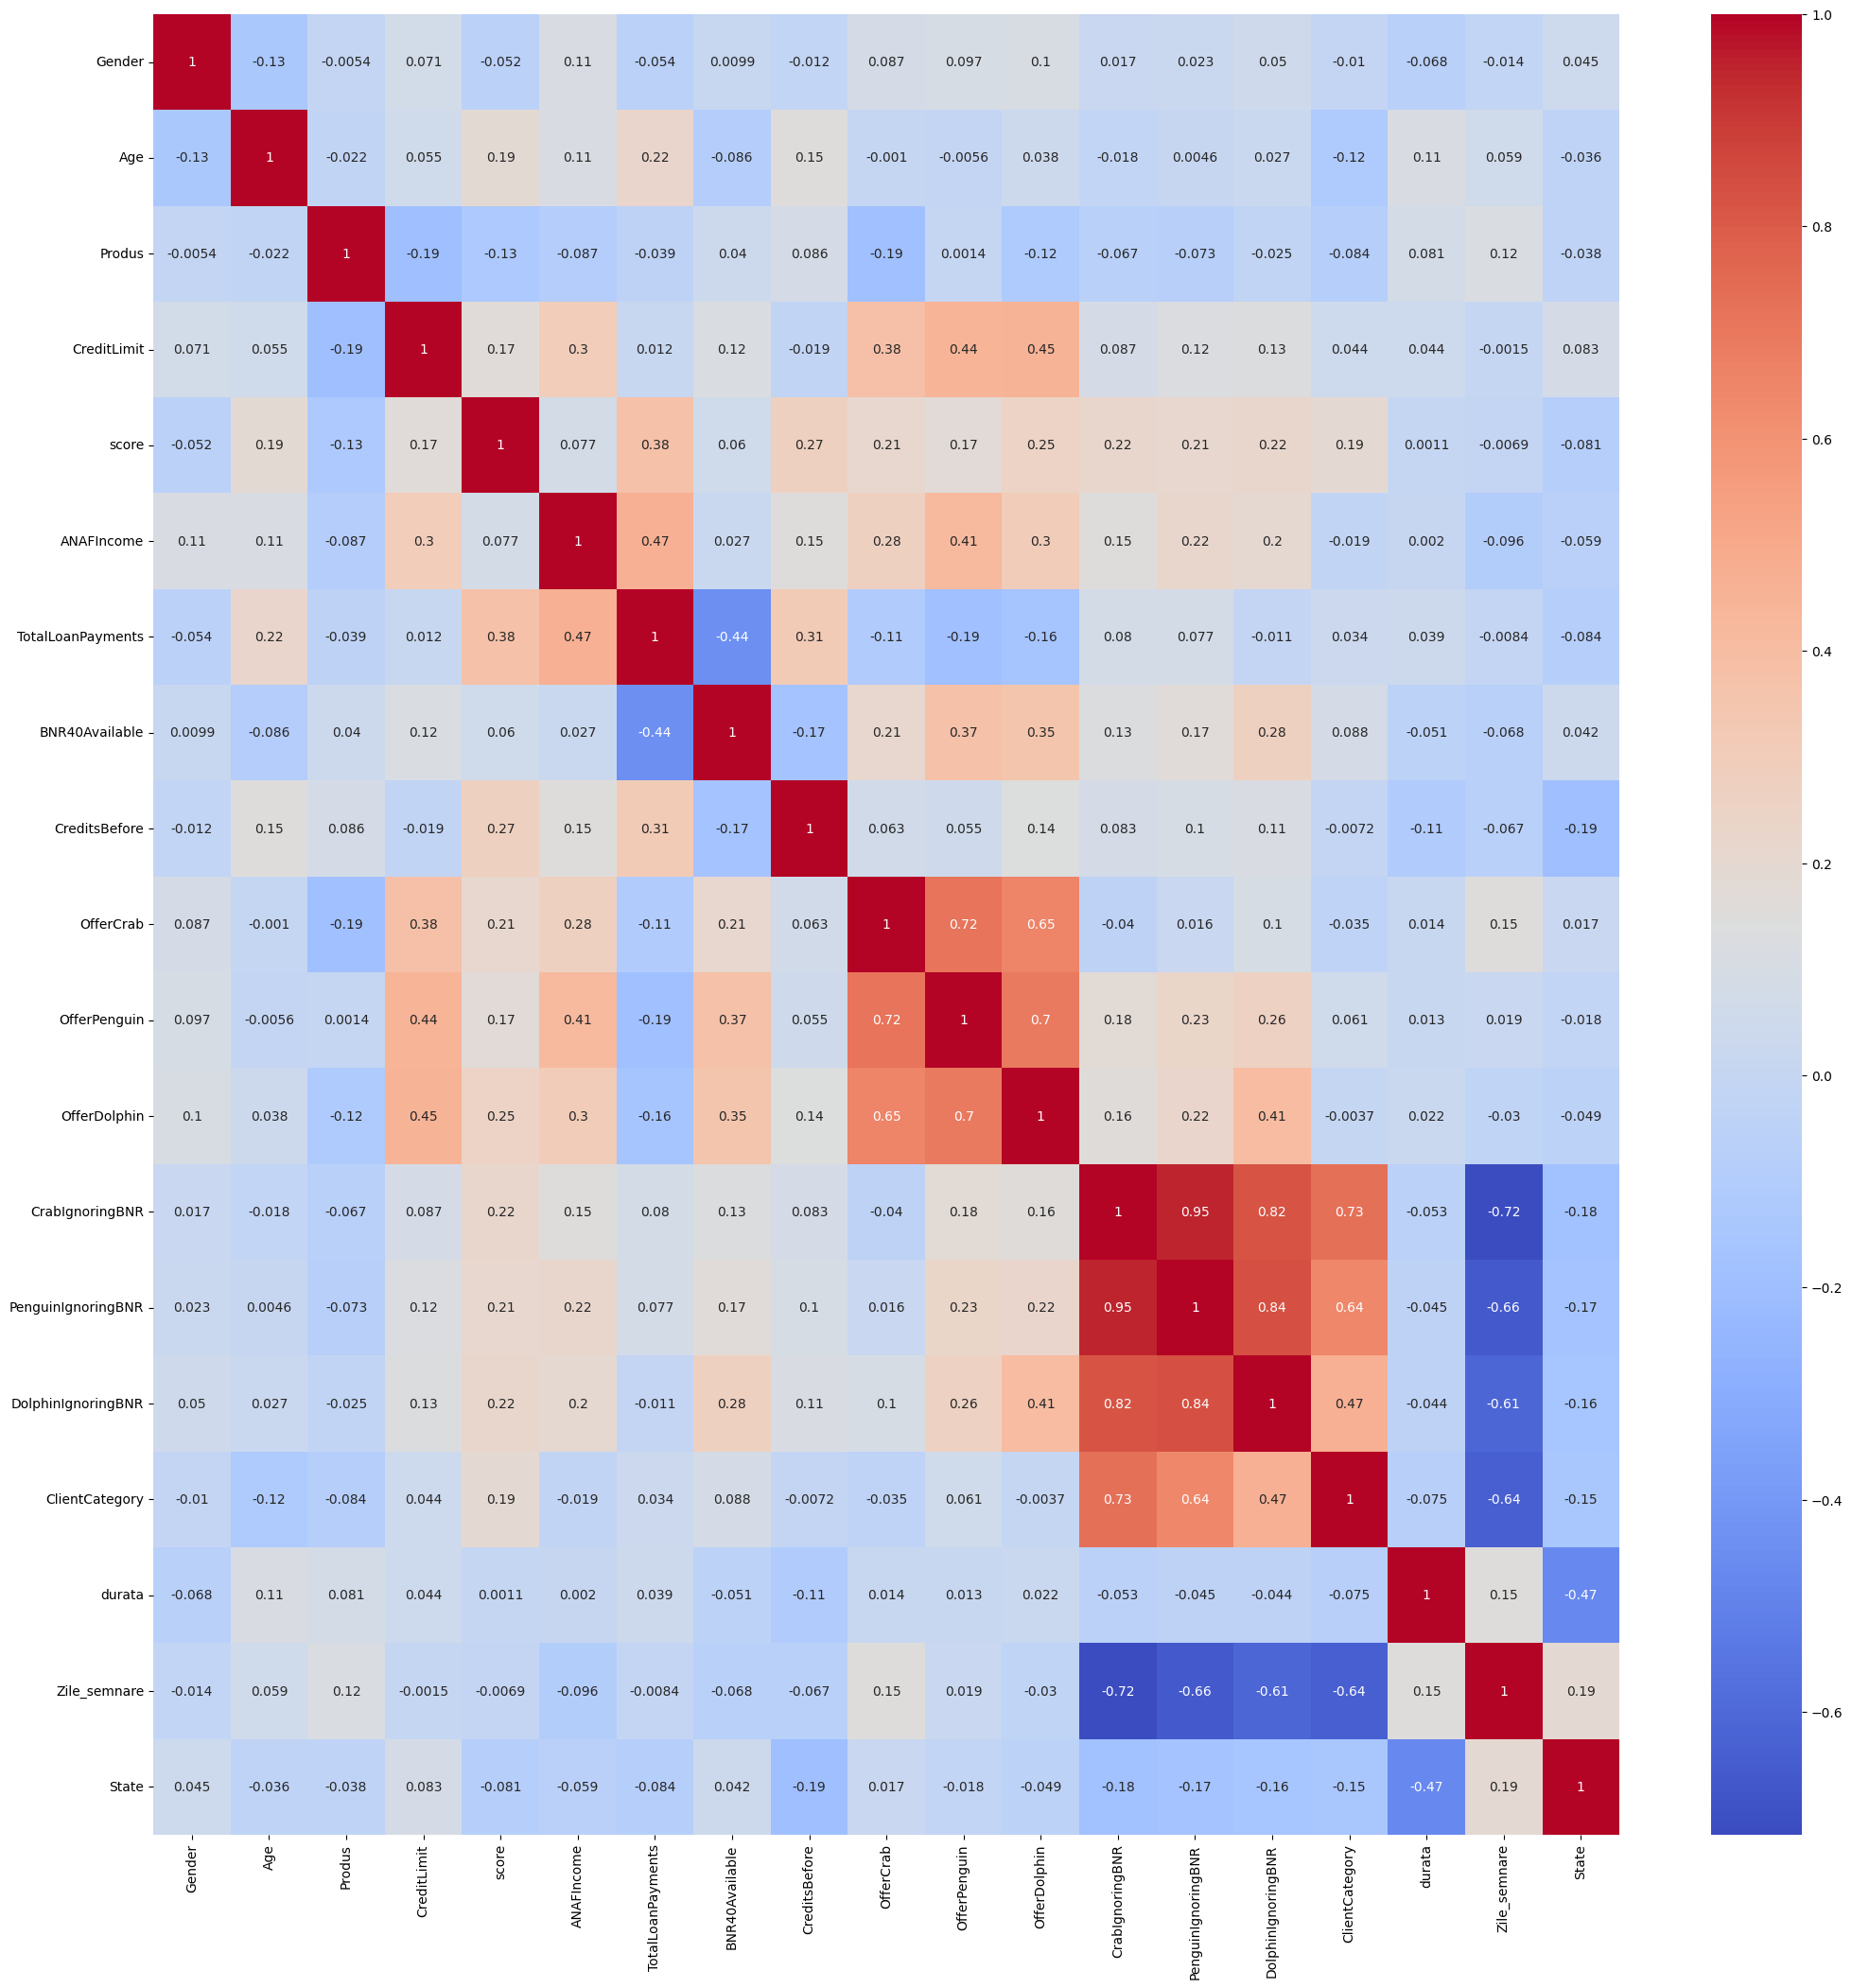

In [52]:
plt.figure(figsize=(25,25))
sns.heatmap(df_total.corr(),annot=True,cmap='coolwarm')

In [53]:
X=X.drop(['durata','Zile_semnare'],axis=1)

<Axes: >

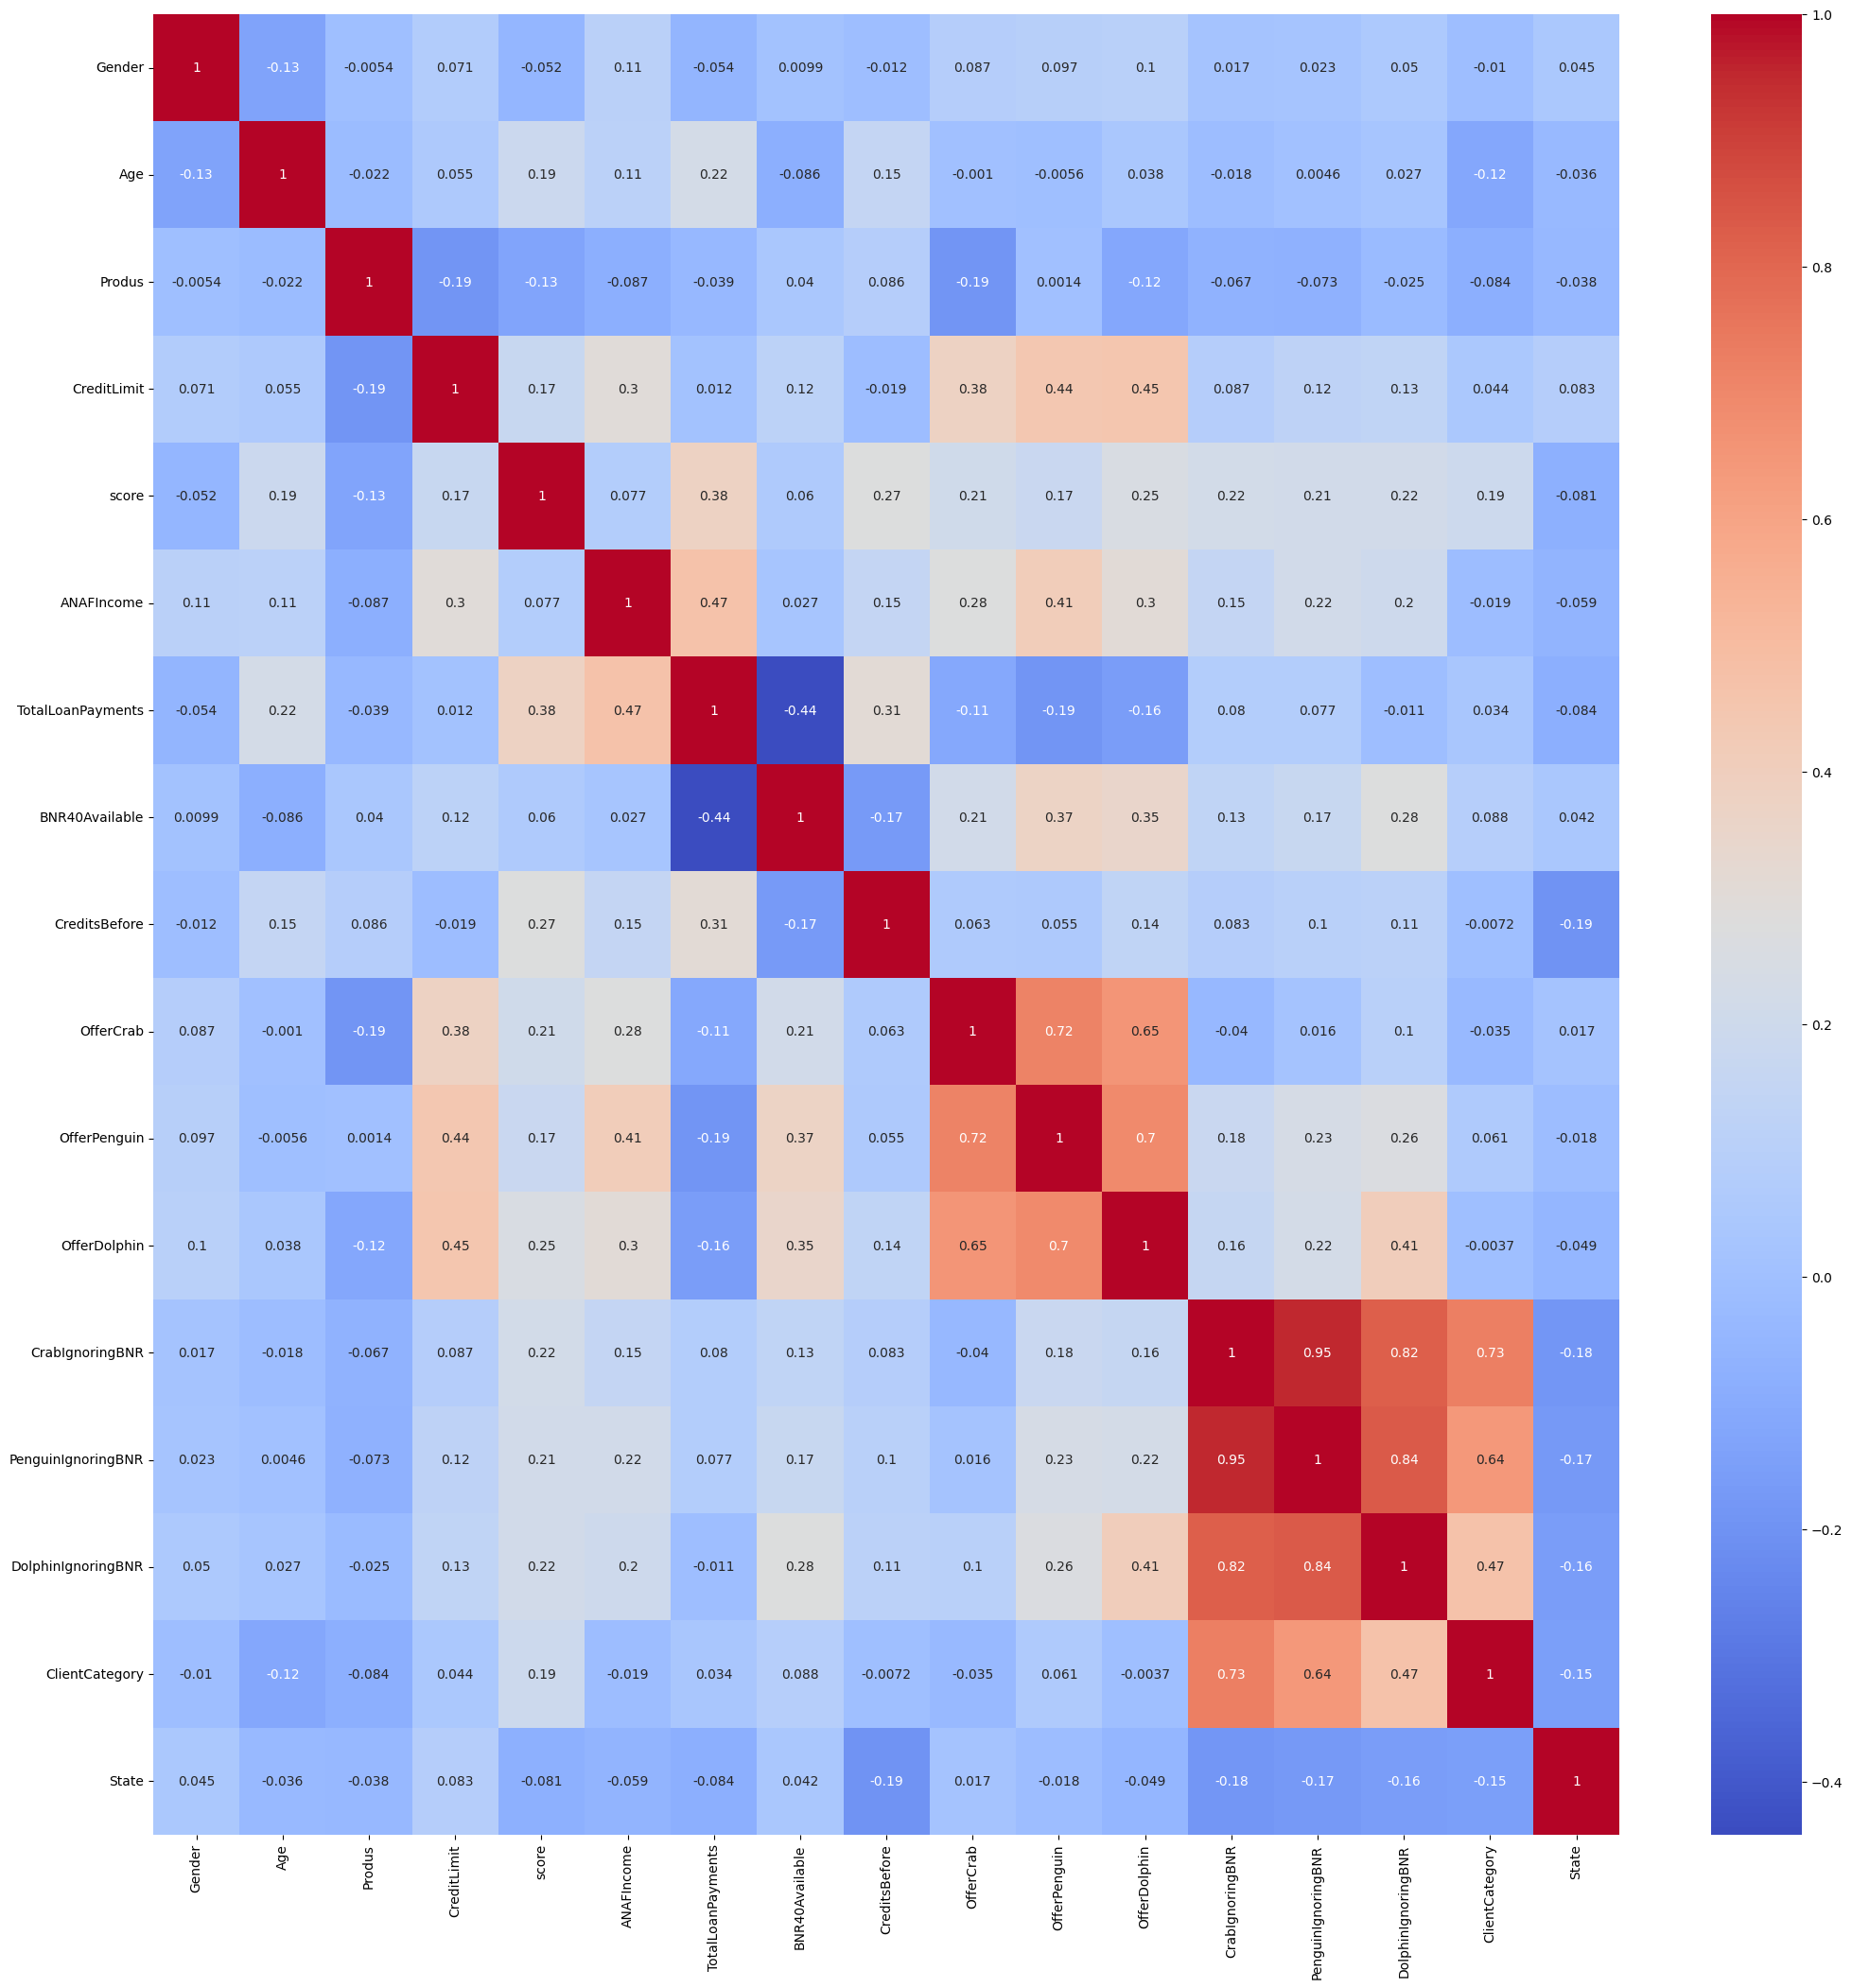

In [54]:
df_total=pd.concat([X,y],axis=1)
plt.figure(figsize=(25,25))
sns.heatmap(df_total.corr(),annot=True,cmap='coolwarm')


              precision    recall  f1-score   support

           0       0.99      0.72      0.84      1368
           1       0.10      0.86      0.18        50

    accuracy                           0.73      1418
   macro avg       0.55      0.79      0.51      1418
weighted avg       0.96      0.73      0.81      1418



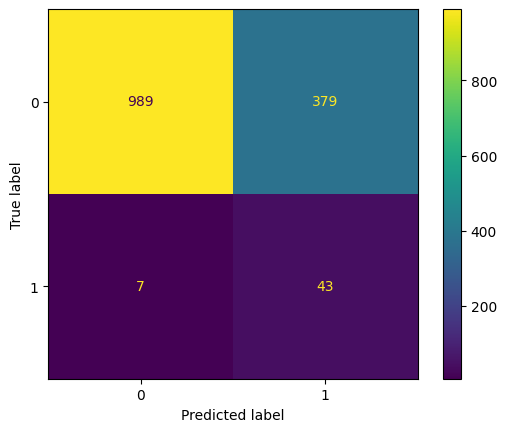

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))

### Observam ca durata contractului are un impact mare,trebuie sa vedem legatura cu alte coloane

In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
def test_model(lr_model,x,y):
    kf = KFold(n_splits=4)
    f1_train = []
    f1_test = []
    for train_index, test_index in kf.split(x):
           x_train, x_test = x.iloc[train_index], x.iloc[test_index]
           y_train, y_test = y.iloc[train_index], y.iloc[test_index]
           lr_model.fit(x_train, y_train)
           y_train_pred = lr_model.predict(x_train)
           y_test_pred = lr_model.predict(x_test)
           f1_train.append(f1_score(y_train, y_train_pred,average='weighted'))
           f1_test.append(f1_score(y_test, y_test_pred,average='weighted'))
    plt.figure(figsize=(7,7))
    folds = range(1, kf.get_n_splits()+1 )
    plt.plot(folds, f1_train, 'o-', color='green', label='train')
    plt.plot(folds, f1_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.title(lr_model)
    plt.xlabel('Number of fold')
    plt.ylabel('f1_score')
    plt.show()

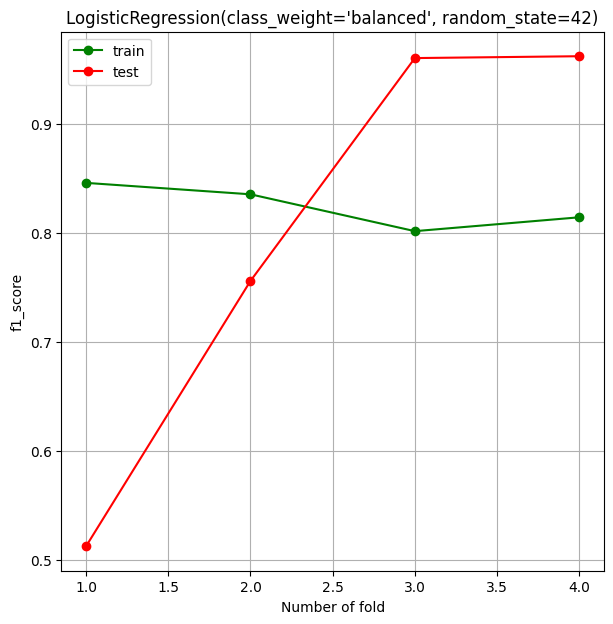

In [57]:
test_model(lr_model,X,y)

# Vom antrena 3 modele ,pentru fiecare tip de produs,deoarece in atrenarea curenta durata contractului are un rol important,insa nu o putem folosi la aplicarea unei cereri de credit nou

In [58]:
print(credite_gata['Produs'].value_counts())

Produs
2    4129
1    2266
0     691
Name: count, dtype: int64


In [79]:
crab_data=X[X['Produs'].isin([0])]
pinguin_data=X[X['Produs'].isin([2])]
delfin_data=X[X['Produs'].isin([1])]
y_crab = df_total.loc[df_total['Produs'] == 0, 'State']
y_pinguin = df_total.loc[df_total['Produs'] == 2, 'State']
y_delfin=df_total.loc[df_total['Produs'] == 1, 'State']

In [80]:
pinguin_data=pinguin_data.drop(['Produs','OfferPenguin','OfferDolphin','CrabIgnoringBNR', 'DolphinIgnoringBNR'],axis=1)
crab_data=crab_data.drop(['Produs','OfferPenguin','OfferDolphin','PenguinIgnoringBNR', 'DolphinIgnoringBNR'],axis=1)
delfin_data=delfin_data.drop(['Produs','OfferPenguin','OfferCrab','CrabIgnoringBNR',
       'PenguinIgnoringBNR', ],axis=1)

<Axes: >

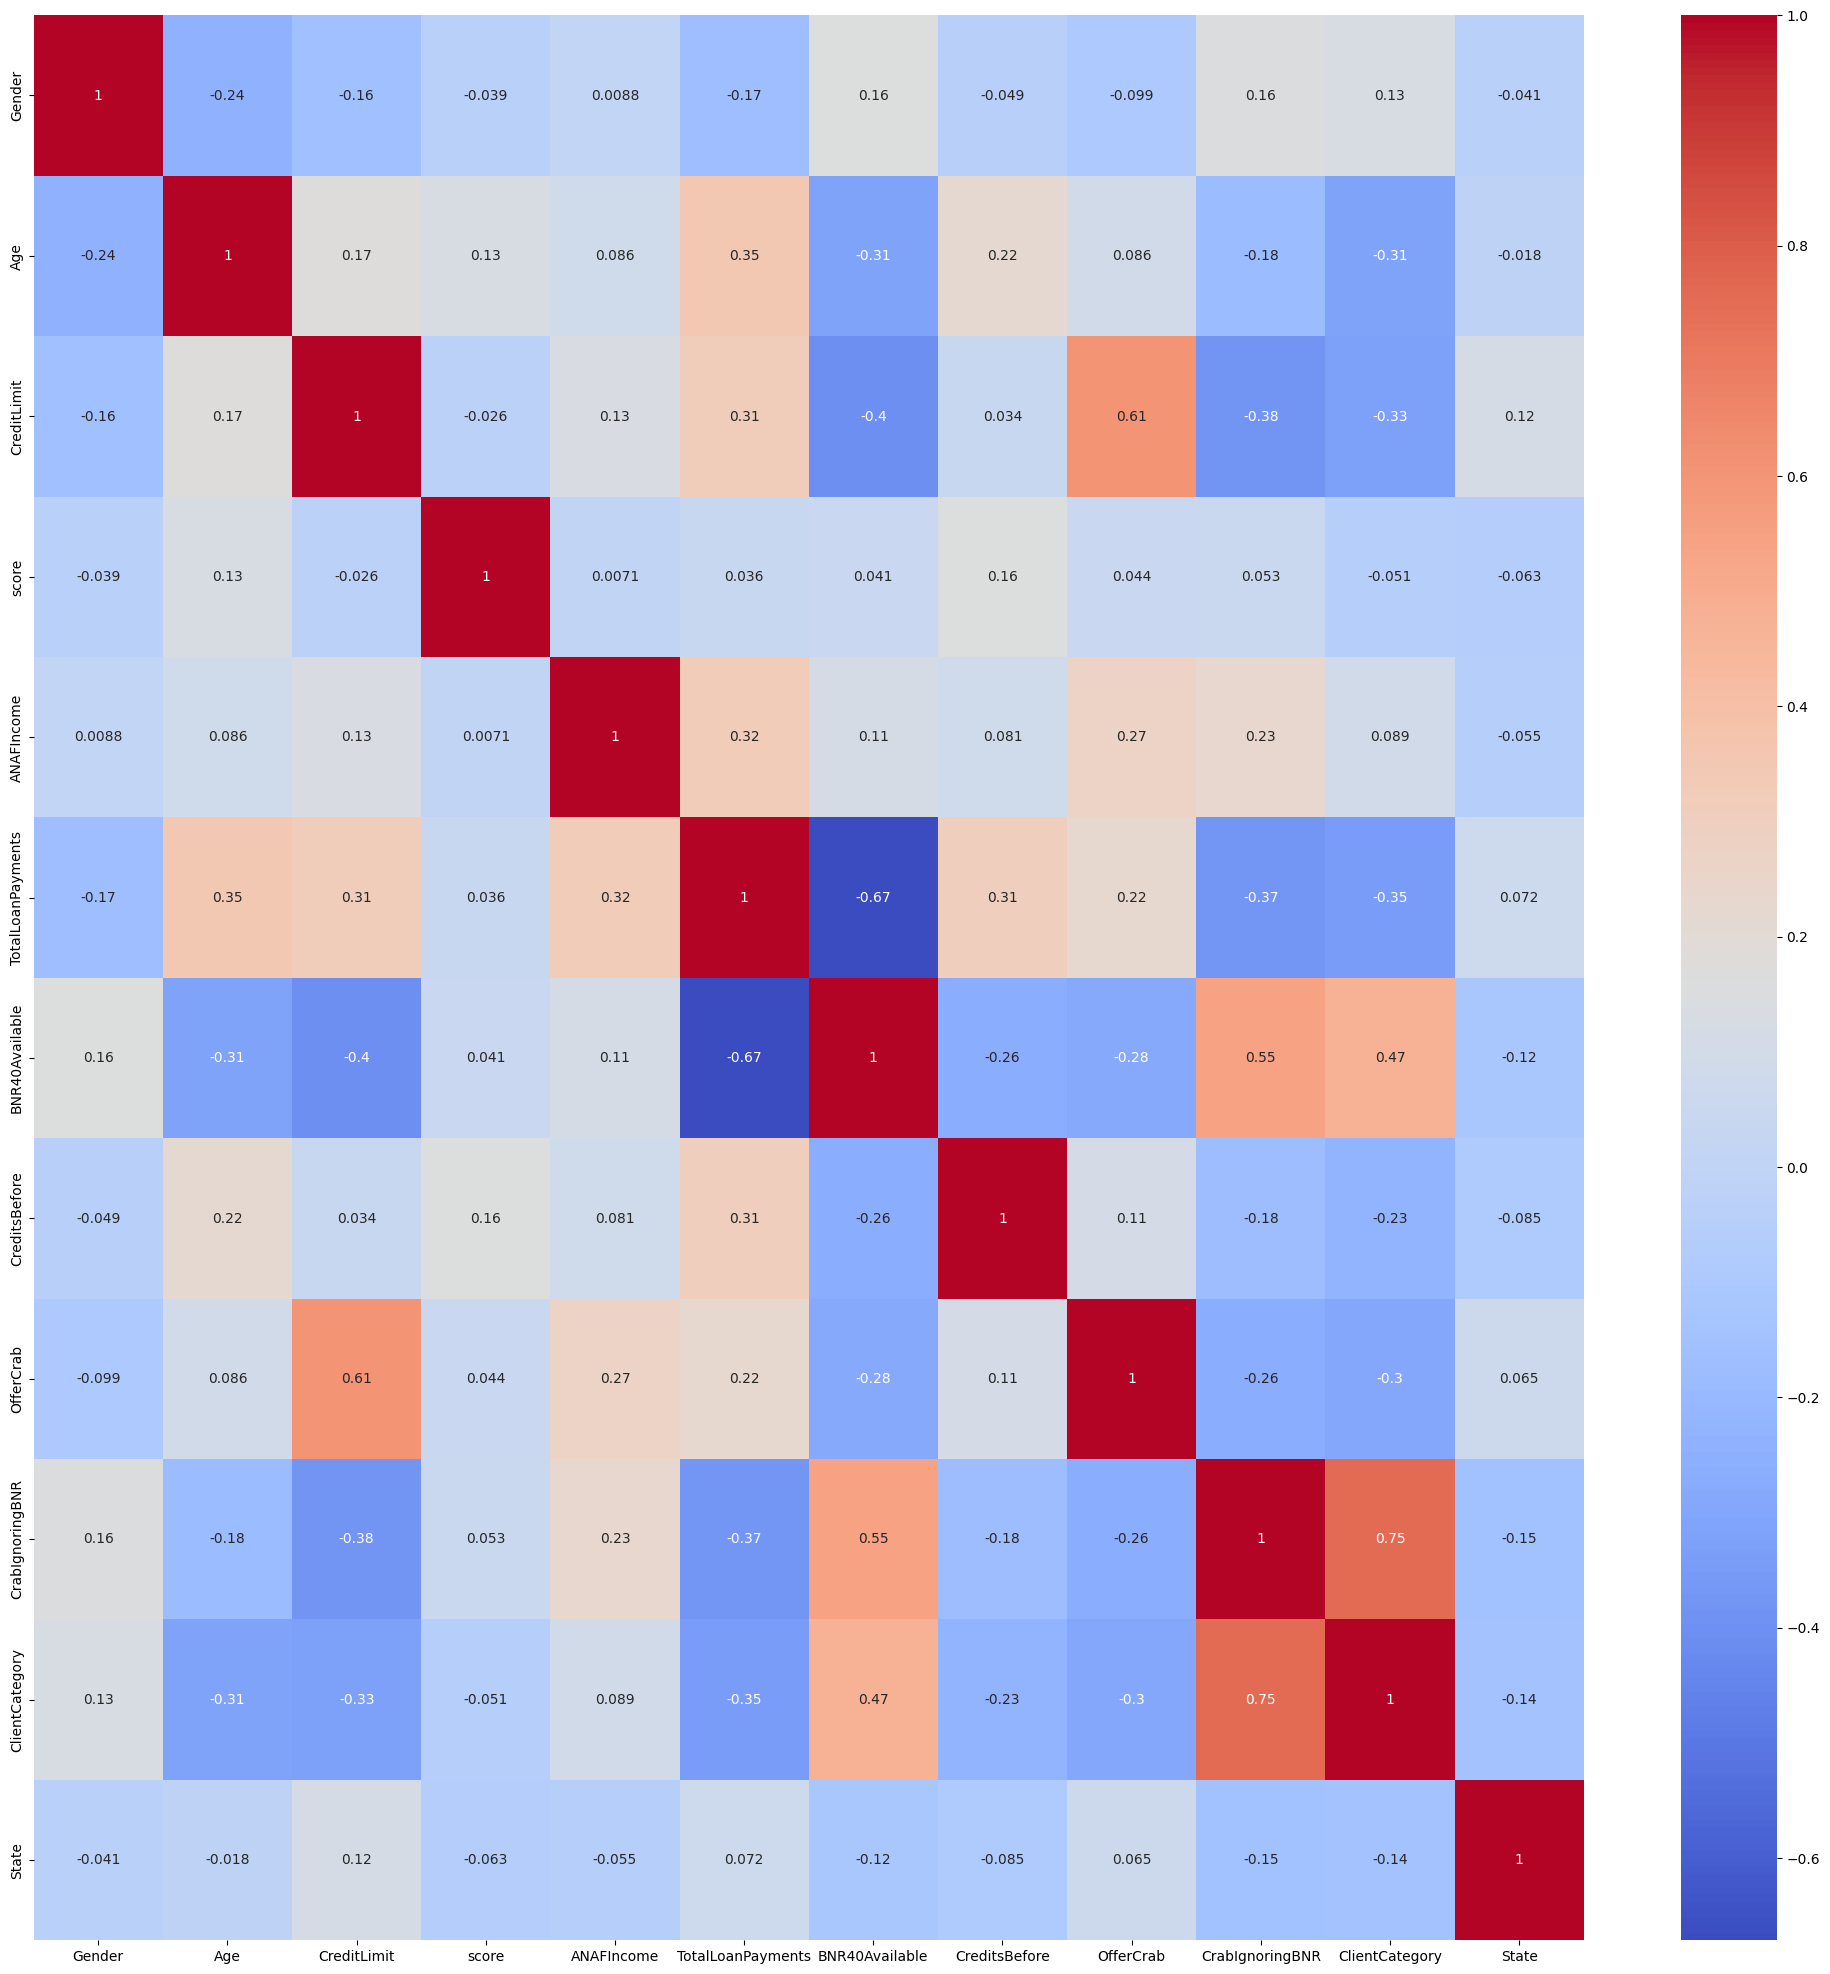

In [118]:
df_crab=pd.concat([crab_data,y_crab],axis=1)
plt.figure(figsize=(25,25))
sns.heatmap(df_crab.corr(),annot=True,cmap='coolwarm')

<Axes: >

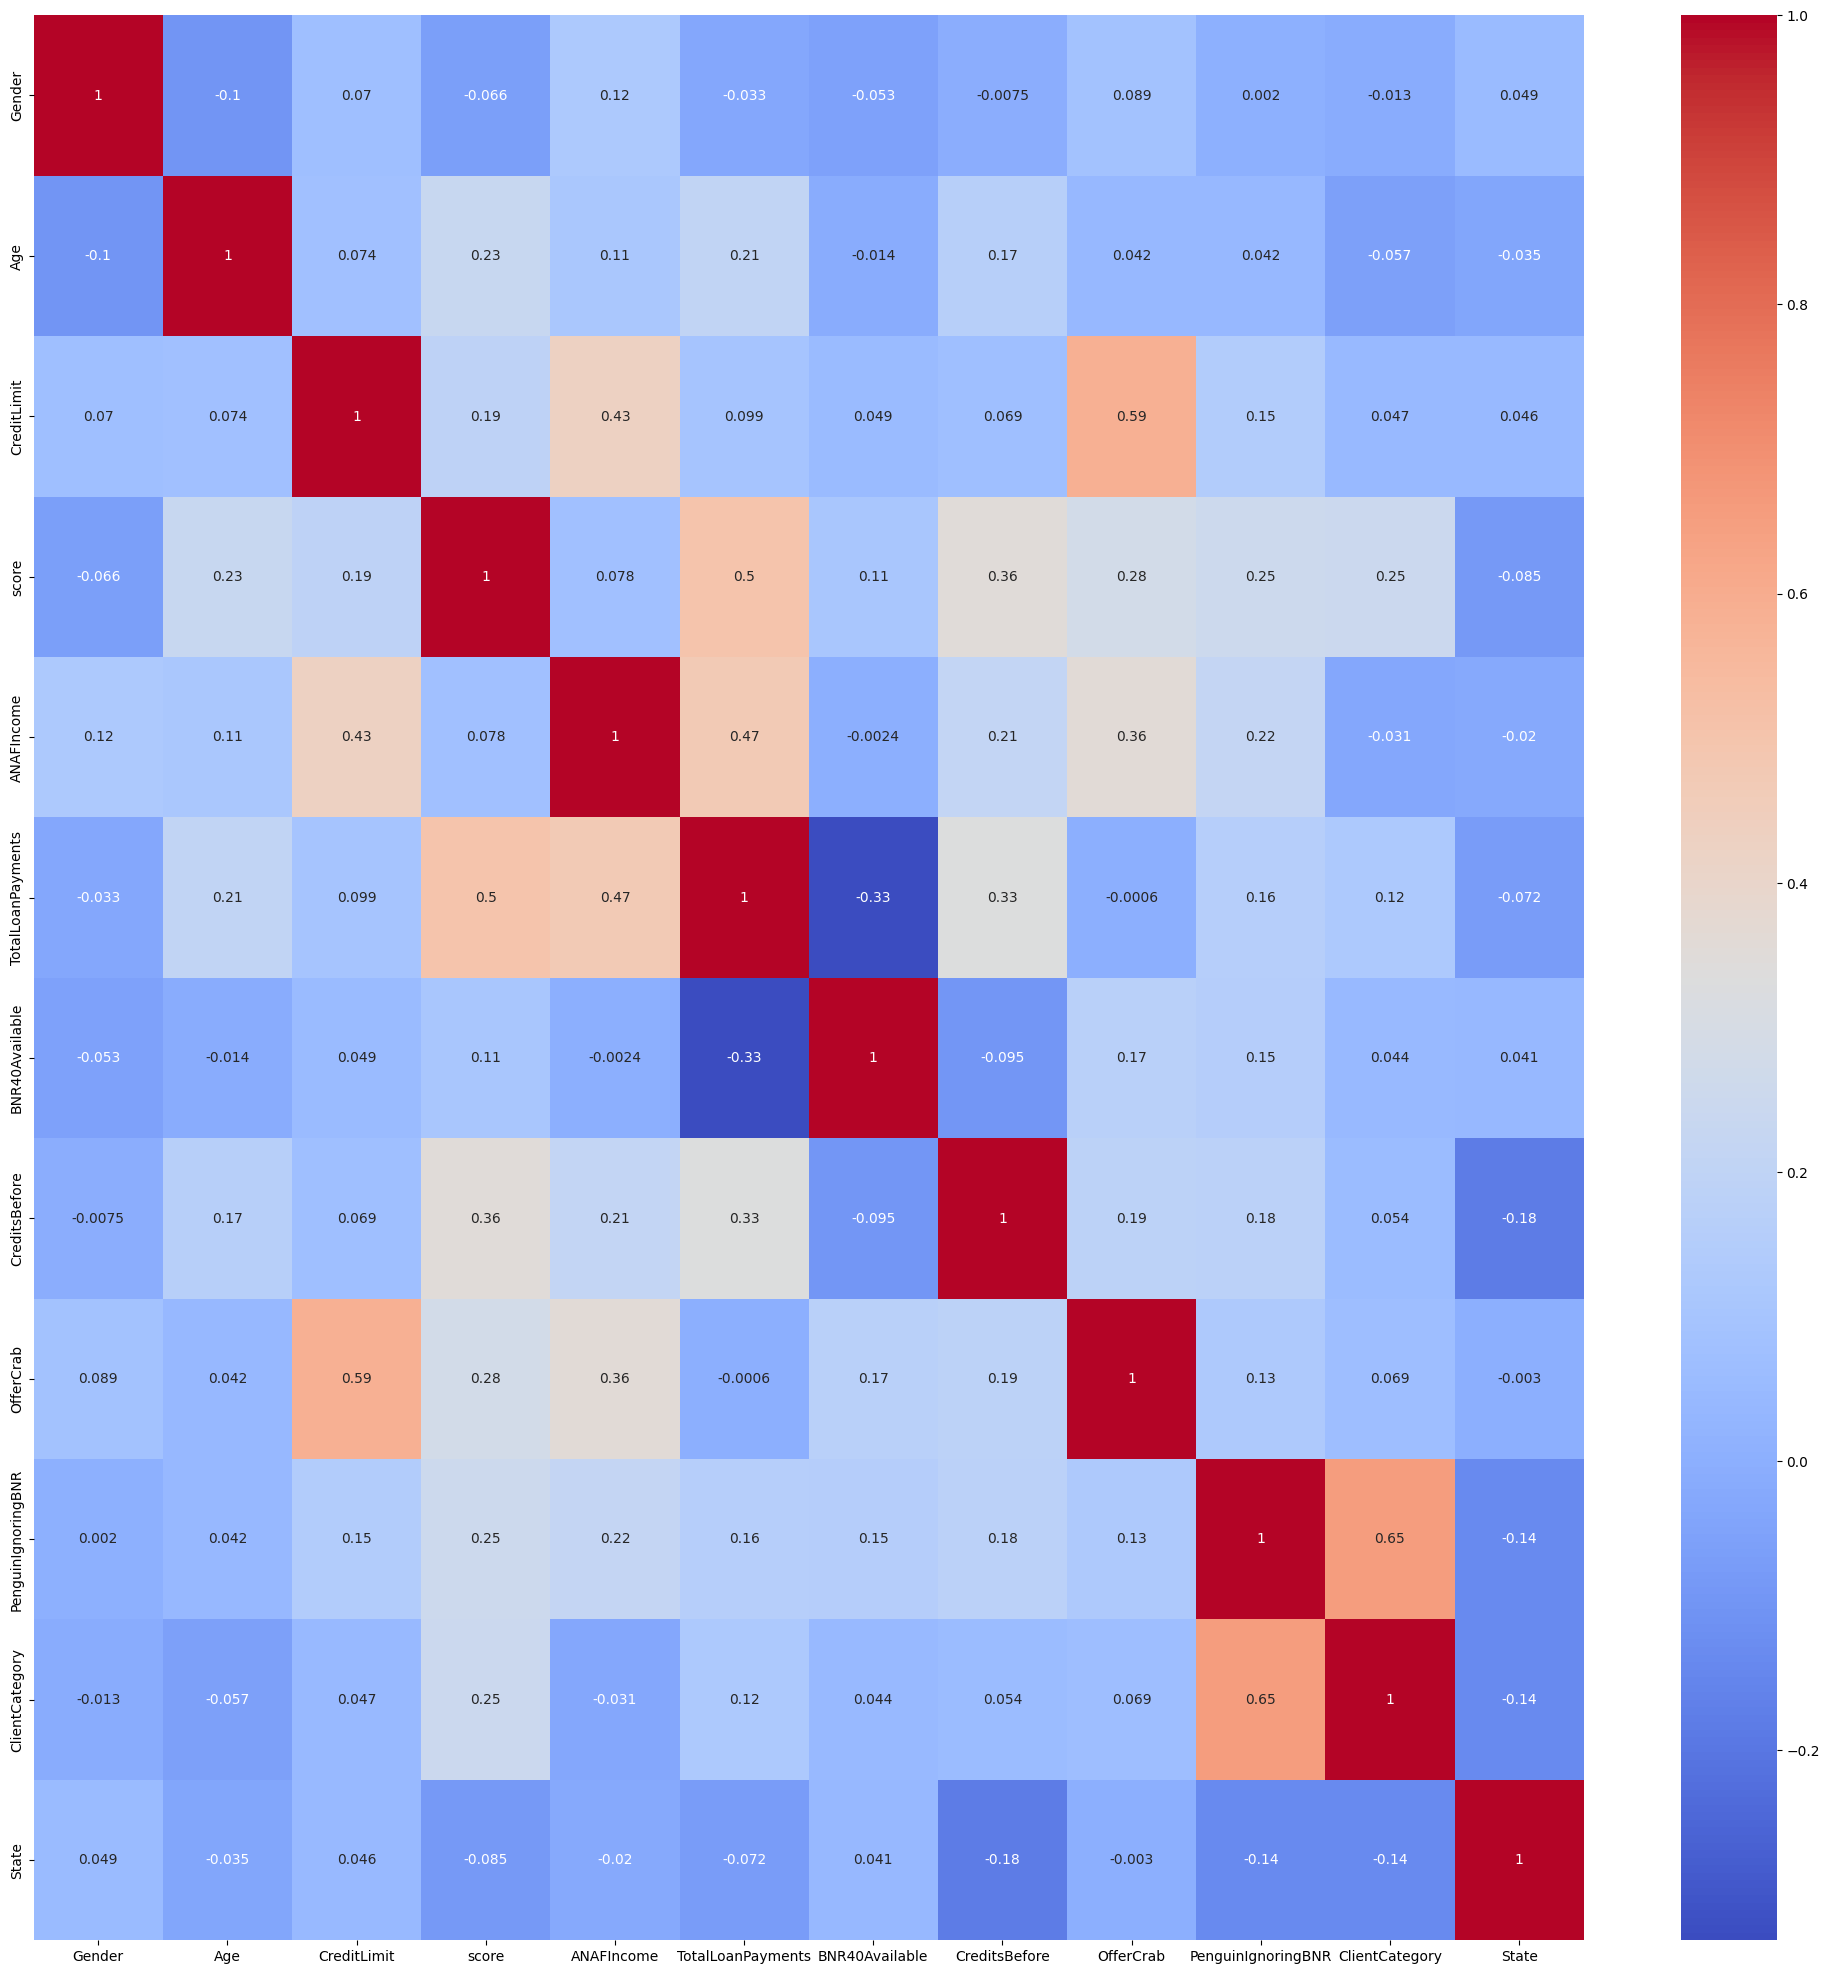

In [120]:
df_pinguin=pd.concat([pinguin_data,y_pinguin],axis=1)
plt.figure(figsize=(25,25))
sns.heatmap(df_pinguin.corr(),annot=True,cmap='coolwarm')

In [94]:
crab_data.shape
y_crab.shape

(691,)

In [98]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

In [99]:
model_list=[LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,BernoulliNB]   
str_model_list=['LR','RF','DT','GNB','KNN','BNB']
def model_list_train(x_train,x_test,y_train,y_test,confusion):
    f1 = []

    for model in model_list :
        if model == model_list[2]:
            clf = model(max_depth = 5,random_state = 0)
            clf.fit(x_train,y_train)
            y_pred_tree = clf.predict(x_test)
            f1.append(f1_score(y_test, y_pred_tree,average='weighted'))
            if confusion =='confusion':
                ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tree)
                print("\n "+str(model)+"\n "+ classification_report(y_test, y_pred_tree))
        else:
            model = model()
            model.fit(x_train,y_train)
            y_pred = model.predict(x_test)
            f1.append(f1_score(y_test, y_pred,average='weighted'))
            if confusion =='confusion':
                ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
                print("\n "+str(model)+"\n "+ classification_report(y_test, y_pred))
    if confusion == 'f1':
        return f1

***************************************]
pinguin

 LogisticRegression()
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       803
           1       0.00      0.00      0.00        23

    accuracy                           0.97       826
   macro avg       0.49      0.50      0.49       826
weighted avg       0.95      0.97      0.96       826


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       803
           1       0.43      0.13      0.20        23

    accuracy                           0.97       826
   macro avg       0.70      0.56      0.59       826
weighted avg       0.96      0.97      0.96       826


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       803
           1       0.00      0.00      0.00        23

    accuracy           

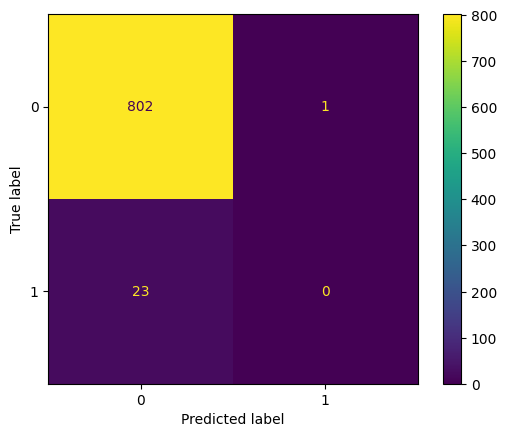

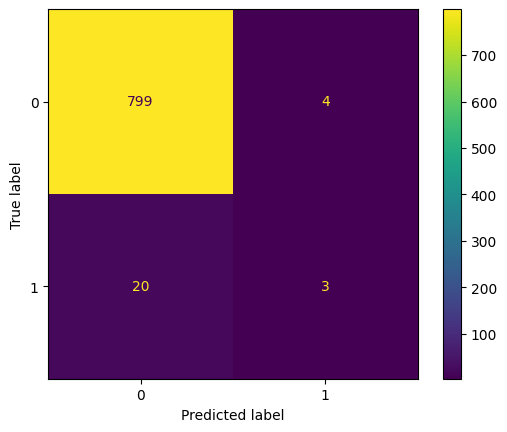

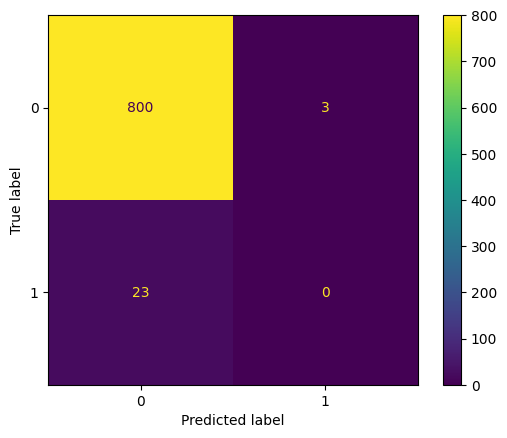

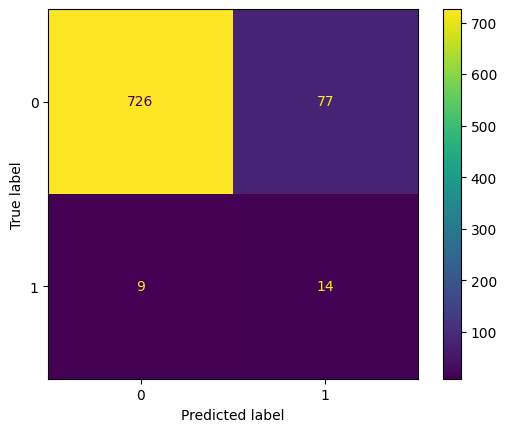

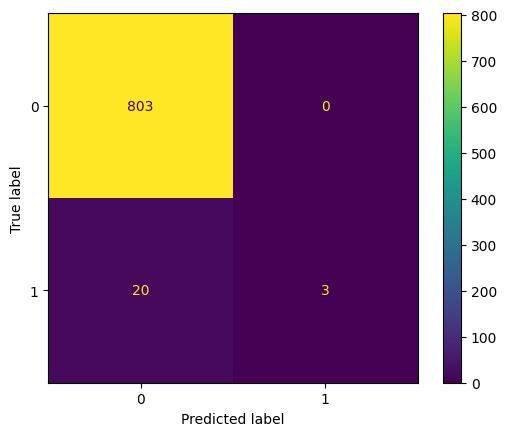

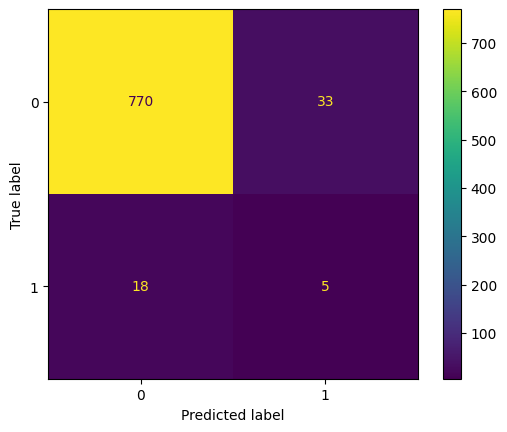

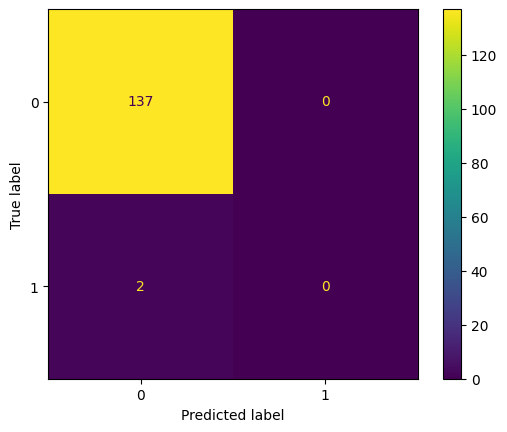

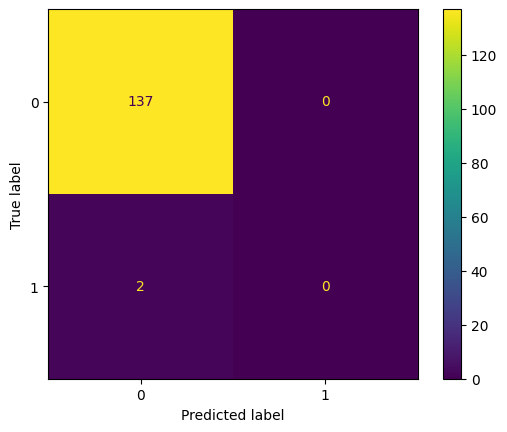

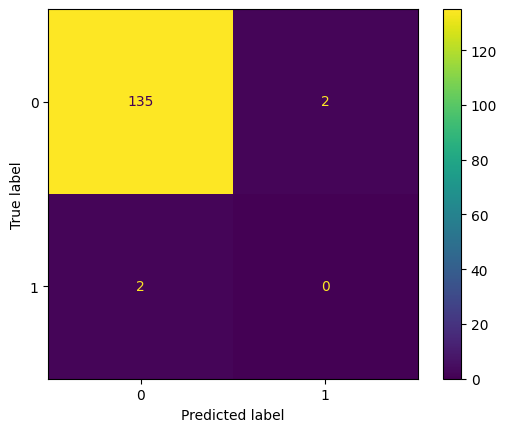

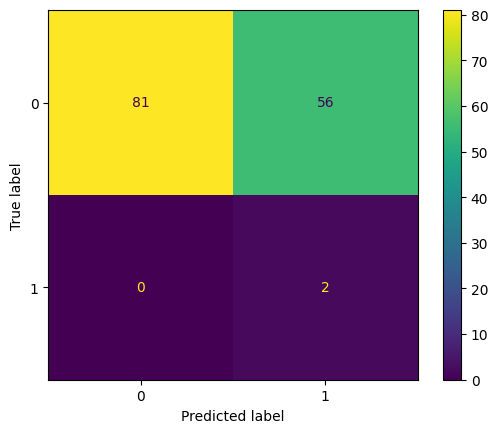

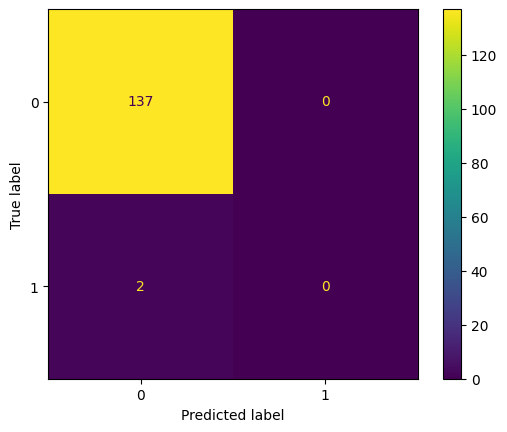

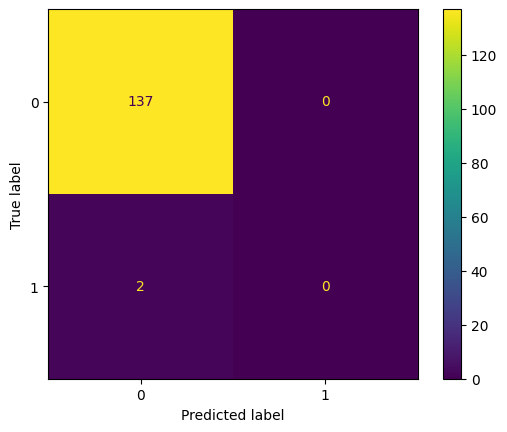

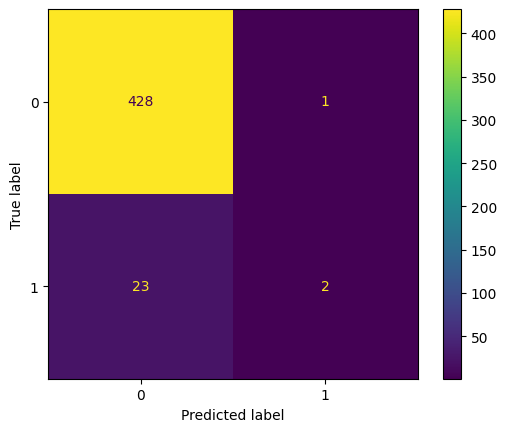

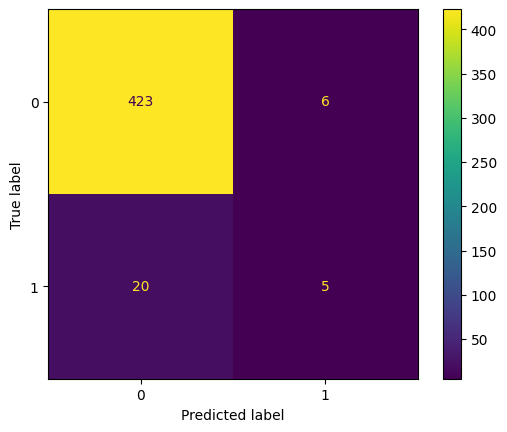

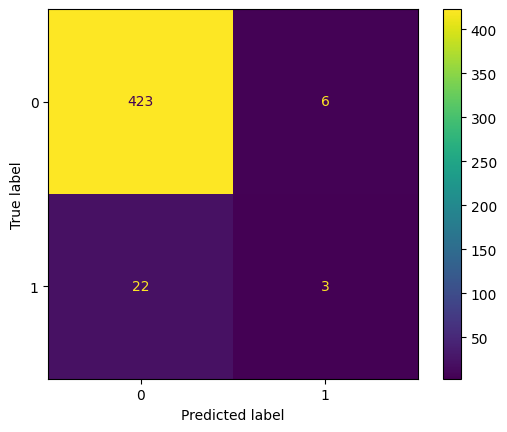

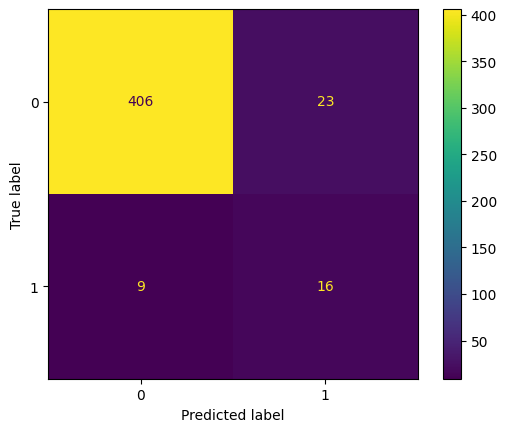

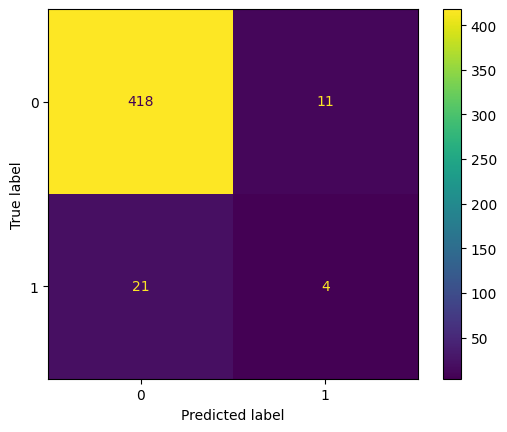

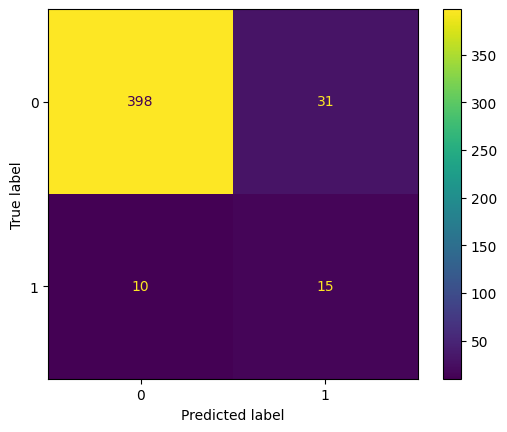

In [103]:
data_multiple=[pinguin_data,crab_data,delfin_data]
target_multiple=[y_pinguin,y_crab,y_delfin]
prod=['pinguin','crab','delfin']
for X,y,dt in zip(data_multiple, target_multiple,prod):
    print(f'***************************************]\n{dt}')
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model_list_train(X_train,X_test,y_train,y_test,confusion='confusion')

#     lr_model.fit(X_train,y_train)
#     y_pred = lr_model.predict(X_test)
#     ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
#     print(f"\n{}\n"+ classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96       429
           1       0.41      0.64      0.50        25

    accuracy                           0.93       454
   macro avg       0.69      0.79      0.73       454
weighted avg       0.95      0.93      0.94       454



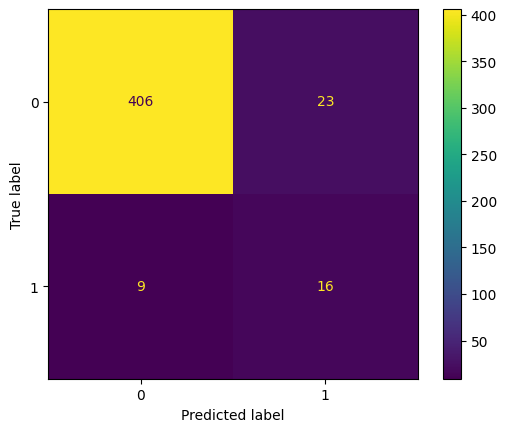

In [107]:
X_train,X_test,y_train,y_test=train_test_split(delfin_data,y_delfin,test_size=0.2,random_state=42)
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       429
           1       0.44      0.32      0.37        25

    accuracy                           0.94       454
   macro avg       0.70      0.65      0.67       454
weighted avg       0.93      0.94      0.94       454



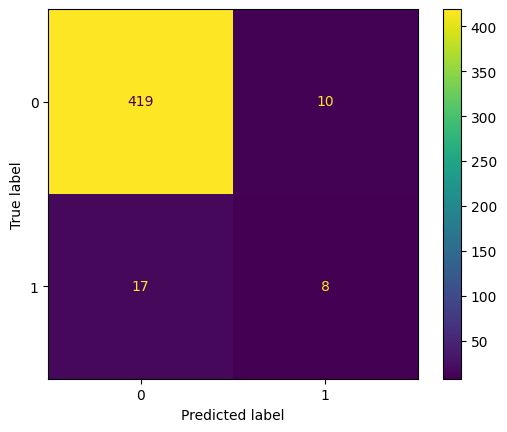

In [117]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary',
    random_state=42
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))